# Different epitopes
Up to now, we've worked with Influenza A virus (GILGFVFTL). Let's take a look at the performance in different epitopes.

We're working with the [vdjdb-db](https://github.com/antigenomics/vdjdb-db/releases) dataset.

In [ ]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_vdjdb = pd.read_csv('data/vdjdb-2022-03-30/vdjdb.txt', sep='\t')
df_vdjdb.head()
# sample 10 items


In [ ]:
#  Print random
df_vdjdb.sample(10)

In [ ]:
# Get the number of unique antigen.epitope
epitopes = df_vdjdb['antigen.epitope'].unique()
print(f'Number of unique epitopes: {len(epitopes)}')

In [ ]:
# Get the top 10 epitopes
epitope_counts = df_vdjdb['antigen.epitope'].value_counts()
epitope_counts.head(10)

In [ ]:
complex_id_counts = df_vdjdb['complex.id'].value_counts()
complex_id_counts.head(10)

Except for 0, they all occur at most twice, so I guess same complex means the alpha and beta belong together.

In [ ]:
top_10_epitopes = epitope_counts.index[:10]

In [ ]:
epitope = "KLGGALQAK"

In [ ]:
import pandas as pd

test_data = {"cid": [1, 1, 2, 3],
             "type": ["A", "B", "B", "A"],
             "v": [1, 2, 3, 4]}
test_df = pd.DataFrame(test_data)
test_df

In [ ]:
test_df_a = test_df[test_df["type"] == "A"]
test_df_b = test_df[test_df["type"] == "B"]

# df_new = test_df_a.join(test_df_b, on="cid", how="outer", lsuffix="_A", rsuffix="_B")
df_new = test_df_a.merge(test_df_b, on="cid", how="outer", suffixes=("_A", "_B"))
df_new

In [ ]:
df_vdjdb_cid_0 = df_vdjdb[df_vdjdb["complex.id"] == 0]
df_vdjdb_no_cid_0 = df_vdjdb.drop(df_vdjdb[df_vdjdb["complex.id"] == 0].index)

df_tra = df_vdjdb_no_cid_0[df_vdjdb_no_cid_0["gene"] == "TRA"]
df_trb = df_vdjdb_no_cid_0[df_vdjdb_no_cid_0["gene"] == "TRB"]

df_new = df_tra.merge(df_trb, on="complex.id", how="outer", suffixes=("_alfa", "_beta"))
df_new.head()

Gemiddelde
bij
random
forest
Onehot
encode
family
en / of
geheel, niet
version
Nearesgt
neighbors
van
5
betas, daarvoor
gemiddelde
alfas
RF
tree
alle
takken
en
gemiddelde, eerst
gewone in Python
Diff
epitope: vdjdb_full
bevat
al
gecombineerd, niet
zelf
incompleet
maken.Dat
er
een
verschil is tussen
complete
incompleet
maken
zeker
vermelden in thesis

Gemiddelde bij random forest Onehot encode family en / of geheel, niet version Nearesgt neighbors van 5 betas, daarvoor gemiddelde alfas RF tree alle takken en gemiddelde, eerst gewone in Python Diff epitope: vdjdb_full bevat al gecombineerd, niet zelf incompleet maken.Dat er een verschil is tussen complete incompleet maken zeker vermelden in thesis

Except for 0, they all occur at most twice, so I guess same complex means the alpha and beta belong together.

In [ ]:
top_10_epitopes = epitope_counts.index[:10]

In [ ]:
epitope = "KLGGALQAK"

In [ ]:
import pandas as pd

test_data = {"cid": [1, 1, 2, 3],
             "type": ["A", "B", "B", "A"],
             "v": [1, 2, 3, 4]}
test_df = pd.DataFrame(test_data)
test_df

In [ ]:
test_df_a = test_df[test_df["type"] == "A"]
test_df_b = test_df[test_df["type"] == "B"]

# df_new = test_df_a.join(test_df_b, on="cid", how="outer", lsuffix="_A", rsuffix="_B")
df_new = test_df_a.merge(test_df_b, on="cid", how="outer", suffixes=("_A", "_B"))
df_new

In [ ]:
df_vdjdb_cid_0 = df_vdjdb[df_vdjdb["complex.id"] == 0]
df_vdjdb_no_cid_0 = df_vdjdb.drop(df_vdjdb[df_vdjdb["complex.id"] == 0].index)

df_tra = df_vdjdb_no_cid_0[df_vdjdb_no_cid_0["gene"] == "TRA"]
df_trb = df_vdjdb_no_cid_0[df_vdjdb_no_cid_0["gene"] == "TRB"]

df_new = df_tra.merge(df_trb, on="complex.id", how="outer", suffixes=("_alfa", "_beta"))
df_new.head()

Gemiddelde bij random forest
Onehot encode family en/of geheel, niet version -> OK (Notebook 15 overzicht van resultaten, beste mss wel nog standard gebruiken in de data.py? Resultaten zijn geensignificant verschil)
Nearesgt neighbors van 5 betas, daarvoor gemiddelde alfas -> OK (resultaten ni echt een verbetering eigenlijk)
RF tree alle takken en gemiddelde, eerst gewone in Python
Diff epitope: vdjdb_full bevat al gecombineerd, niet zelf incompleet maken. Dat er een verschil is tussen complete incompleet maken zeker vermelden in thesis

Appearently I don't need to combine the datasets myself, vdjdb_full already contains the combined data, so let's continue with that.

In [ ]:
import pandas as pd

df_vdjdb = pd.read_csv('data/vdjdb-2022-03-30/vdjdb_full.txt', sep='\t')
df_vdjdb.head()

In [ ]:
rename_columns = {
    'antigen.epitope': 'epitope',
    'cdr3.alpha': 'CDR3_alfa',
    'v.alpha': 'TRAV',
    'j.alpha': 'TRAJ',
    'cdr3.beta': 'CDR3_beta',
    'v.beta': 'TRBV',
    'j.beta': 'TRBJ',
}

df_vdjdb = df_vdjdb.rename(columns=rename_columns)
df_vdjdb = df_vdjdb[rename_columns.values()]
df_vdjdb.head()

In [ ]:
# Get the number of unique antigen.epitope
epitopes = df_vdjdb['epitope'].unique()
print(f'Number of unique epitopes: {len(epitopes)}')

# Get the top 10 most occuring epitopes
epitope_counts = df_vdjdb['epitope'].value_counts()
most_occuring_epitopes = epitope_counts.head(10)
most_occuring_epitopes

In [ ]:
current_epitope = "KLGGALQAK"
# Need to try another epitope, since with this epitope, I get:
#  Positive samples: alpha only: 0, beta only: 0, both: 13974, none: 0
#  Negative samples: alpha only: 6712, beta only: 23171, both: 10904, none: 0
# So there aren't enough negative complete samples to get the same distributions
# A possible solution would be to drop some positive samples,
#  however, I didn't do that, since there are no missing samples, so this epitope is irrelevant for the thesis

# heeft problemnin dataset, wel als negatief

In [ ]:
current_epitope = "GILGFVFTL"

positive_samples = df_vdjdb[df_vdjdb['epitope'] == current_epitope]
negative_samples = df_vdjdb[df_vdjdb['epitope'] != current_epitope]


# Remove items from negative_samples that are in positive_samples
def remove_items_occuring_in_other_column(df1, column_to_remove, df2, column_to_check):
    """Remove all items from column_to_remove that occur in column_to_check"""
    items_to_remove = df2[column_to_check].unique()

    # remove NaN values
    items_to_remove = items_to_remove[~pd.isnull(items_to_remove)]

    df = df1[~df1[column_to_remove].isin(items_to_remove)]
    return df


def remove_negative_positive_cdr3_overlap(negative_samples, positive_samples):
    previous_len = len(negative_samples)

    negative_samples = remove_items_occuring_in_other_column(negative_samples, 'CDR3_alfa', positive_samples,
                                                             'CDR3_alfa')
    negative_samples = remove_items_occuring_in_other_column(negative_samples, 'CDR3_beta', positive_samples,
                                                             'CDR3_beta')

    # TOASK: Are the options below possible (Number of negative samples changed from 52225 to 24444 for GIL)
    # negative_samples = remove_items_occuring_in_other_column(negative_samples, 'CDR3_alfa', positive_samples,
    #                                                          'CDR3_beta')
    # negative_samples = remove_items_occuring_in_other_column(negative_samples, 'CDR3_beta', positive_samples,
    #                                                          'CDR3_alfa')

    if len(negative_samples) != previous_len:
        print(f'Number of negative samples changed from {previous_len} to {len(negative_samples)}')

    return negative_samples

In [ ]:
negative_samples = remove_negative_positive_cdr3_overlap(negative_samples, positive_samples)

In [ ]:
# get the counts of positive dataset containing alpha, beta and both (so the number of columns where it's not NaN)
def filter_df(df, alpha_not_nan, beta_not_nan):
    alpha_condition = df['CDR3_alfa'].notna() if alpha_not_nan else df['CDR3_alfa'].isna()
    beta_condition = df['CDR3_beta'].notna() if beta_not_nan else df['CDR3_beta'].isna()
    return df[alpha_condition & beta_condition]


def get_counts(positive_samples):
    alpha_only_count_pos = len(filter_df(positive_samples, alpha_not_nan=True, beta_not_nan=False))
    beta_only_count_pos = len(filter_df(positive_samples, alpha_not_nan=False, beta_not_nan=True))
    both_count_pos = len(filter_df(positive_samples, alpha_not_nan=True, beta_not_nan=True))
    non_count_pos = len(filter_df(positive_samples, alpha_not_nan=False, beta_not_nan=False))
    return alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos

In [ ]:
alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos = get_counts(positive_samples)
print(
    f'Positive samples: alpha only: {alpha_only_count_pos}, beta only: {beta_only_count_pos}, both: {both_count_pos}, none: {non_count_pos}')

In [ ]:
def get_negative_subsets(negative_samples):
    negative_alpha_only = filter_df(negative_samples, alpha_not_nan=True, beta_not_nan=False)
    negative_beta_only = filter_df(negative_samples, alpha_not_nan=False, beta_not_nan=True)
    negative_both = filter_df(negative_samples, alpha_not_nan=True, beta_not_nan=True)
    negative_none = filter_df(negative_samples, alpha_not_nan=False, beta_not_nan=False)
    return negative_alpha_only, negative_beta_only, negative_both, negative_none


In [ ]:

negative_alpha_only, negative_beta_only, negative_both, negative_none = get_negative_subsets(negative_samples)

print(
    f'Negative samples: alpha only: {len(negative_alpha_only)}, beta only: {len(negative_beta_only)}, both: {len(negative_both)}, none: {len(negative_none)}')

In [ ]:
# Create a custom exception for when there are not enough samples
class NotEnoughSamplesException(Exception):
    pass


def get_negative_df(negative_alpha_only, negative_beta_only, negative_both, negative_none,
                    alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos):
    try:
        # Sample the negative samples to the same size as the positive samples
        negative_df_alpha_only = negative_alpha_only.sample(n=alpha_only_count_pos, random_state=42)
        negative_df_beta_only = negative_beta_only.sample(n=beta_only_count_pos, random_state=42)
        negative_df_both = negative_both.sample(n=both_count_pos, random_state=42)
        negative_df_none = negative_none.sample(n=non_count_pos, random_state=42)
    except ValueError:
        print('Not enough negative samples to sample from')
        raise NotEnoughSamplesException()

    negative_df = pd.concat([negative_df_alpha_only, negative_df_beta_only, negative_df_both, negative_df_none])
    return negative_df

In [ ]:
negative_df = get_negative_df(negative_alpha_only, negative_beta_only, negative_both, negative_none,
                              alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos)

In [ ]:
def combine_and_shuffle(positive_samples, negative_df):
    # Combine positive_samples and negative_df and shuffle
    df = pd.concat([positive_samples, negative_df])
    df['reaction'] = df['epitope'].apply(lambda x: 1 if x == current_epitope else 0)
    df = df.drop(columns=['epitope'])
    df = df.sample(frac=1, random_state=42)
    return df


In [ ]:
df = combine_and_shuffle(positive_samples, negative_df)

In [ ]:
from util import split_gene_in_columns

In [ ]:
split_gene_in_columns(df)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
test = test.dropna()

In [ ]:
train.head()

In [ ]:
from util import get_features, fix_test

train_y = train['reaction']
test_y = test['reaction']
train_x = get_features(train)
test_x = get_features(test, test=True)
test_x = fix_test(test_x, train_x.columns)

In [ ]:
from util import evaluate_no_cv
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(random_state=42)
evaluate_no_cv(clf, train_x, train_y, test_x, test_y)

In [ ]:
def get_epitope_df(epitope, silent=False):
    positive_samples = df_vdjdb[df_vdjdb['epitope'] == epitope]
    negative_samples = df_vdjdb[df_vdjdb['epitope'] != epitope]

    negative_samples = remove_negative_positive_cdr3_overlap(negative_samples, positive_samples)

    alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos = get_counts(positive_samples)
    print(
        f'Positive samples: alpha only: {alpha_only_count_pos}, beta only: {beta_only_count_pos}, both: {both_count_pos}, none: {non_count_pos}') if not silent else None

    negative_alpha_only, negative_beta_only, negative_both, negative_none = get_negative_subsets(negative_samples)
    print(
        f'Negative samples: alpha only: {len(negative_alpha_only)}, beta only: {len(negative_beta_only)}, both: {len(negative_both)}, none: {len(negative_none)}') if not silent else None

    negative_df = get_negative_df(negative_alpha_only, negative_beta_only, negative_both, negative_none,
                                  alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos)

    df = combine_and_shuffle(positive_samples, negative_df)

    split_gene_in_columns(df)

    return df

In [ ]:
scores = dict()
for epitope in most_occuring_epitopes.index:
    try:
        print(f'\nEvaluating eptiope {epitope}...')

        try:
            df = get_epitope_df(epitope, silent=True)
            print(f'Epitope has {len(df)} samples')
        except NotEnoughSamplesException:
            print(f'Error creating dataframe for epitope {epitope}')
            continue

        scores[epitope] = []
        for seed in range(5):
            train, test = train_test_split(df, test_size=0.2, random_state=seed)
            test = test.dropna()

            train_y = train['reaction']
            test_y = test['reaction']
            train_x = get_features(train)
            test_x = get_features(test, test=True)
            test_x = fix_test(test_x, train_x.columns)

            clf = HistGradientBoostingClassifier(random_state=42)
            score = evaluate_no_cv(clf, train_x, train_y, test_x, test_y)
            scores[epitope].append(score)

    except Exception as e:
        print(f'Error evaluating epitope {epitope}: {e}')
        continue

scores

In [ ]:
# scores = {'GILGFVFTL': 0.9238734875527328,
#  'NLVPMVATV': 0.8530805687203792,
#  'ELAGIGILTV': 0.842857142857143,
#  'AVFDRKSDAK': 0.849768875192604,
#  'RAKFKQLL': 0.8561259411362081,
#  'GLCTLVAML': 0.9473039215686274,
#  'YLQPRTFLL': 0.9874015748031496}

In [ ]:
# scores = {'KLGGALQAK': [],
#  'GILGFVFTL': [0.9266650037415815,
#   0.9251343312224141,
#   0.940011423455132,
#   0.9393050615595075,
#   0.9249483945638297],
#  'NLVPMVATV': [0.8268608414239482,
#   0.8774542992552471,
#   0.9177409453652547,
#   0.8938144329896908,
#   0.8480902777777778],
#  'ELAGIGILTV': [0.9010791366906475,
#   1.0,
#   0.8585131894484412,
#   0.9565637065637065,
#   0.9107142857142857],
#  'AVFDRKSDAK': [0.9058162267839688,
#   0.9297302937033753,
#   0.8942094662638469,
#   0.8754820936639118,
#   0.8885083713850837],
#  'RAKFKQLL': [0.8462873931623931,
#   0.8971547125074095,
#   0.9482456140350878,
#   0.9494736842105262,
#   0.8801859799713877],
#  'GLCTLVAML': [0.8661270236612703,
#   0.8707191780821918,
#   0.8438095238095239,
#   0.990234375,
#   0.834108527131783],
#  'YLQPRTFLL': [0.850328947368421,
#   0.9571428571428571,
#   0.8958333333333333,
#   0.9211678832116789,
#   0.9490586932447398],
#  'TTPESANL': [],
#  'CTPYDINQM': []}

In [ ]:
import numpy as np

scores_df = pd.DataFrame()
for key, value in scores.items():
    # add a row for each value
    scores_df = scores_df.append(pd.DataFrame({"model": key, "score": value}))
baseline = np.mean(scores['GILGFVFTL'])
scores_df["improvement"] = scores_df["score"] - baseline
scores_df

In [ ]:
import seaborn as sns

plot = sns.barplot(x="model", y="score", data=scores_df, ci="sd")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
pass

In [ ]:
plot = sns.barplot(x="model", y="improvement", data=scores_df, ci="sd")

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plot.axhline(0, color="k", clip_on=False)
y_ticks = plot.get_yticks()
plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])
pass

The more occuring epitopes obviously have the advantage of having a lot more train data to work with. Let's try to reduce all number of samples to the same YLQPRTFLL has (2652).

In [ ]:
% % capture
from util import split_gene_in_columns, get_features, fix_test, evaluate_no_cv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier

scores = pd.DataFrame()
for epitope in most_occuring_epitopes.index:
    try:
        print(f'\nEvaluating eptiope {epitope}...')

        try:
            df = get_epitope_df(epitope, silent=True)
            print(f'Epitope has {len(df)} samples')
        except NotEnoughSamplesException:
            print(f'Error creating dataframe for epitope {epitope}')
            continue

        for seed in range(5):
            reduced_df = df.sample(n=2652, random_state=seed)
            train, test = train_test_split(reduced_df, test_size=0.2, random_state=seed)
            test = test.dropna()

            train_y = train['reaction']
            test_y = test['reaction']
            train_x = get_features(train)
            test_x = get_features(test, test=True)
            test_x = fix_test(test_x, train_x.columns)

            clf = HistGradientBoostingClassifier(random_state=42)
            score = evaluate_no_cv(clf, train_x, train_y, test_x, test_y)
            scores = scores.append({"model": epitope, "score": score}, ignore_index=True)
        # break
    except Exception as e:
        print(f'Error evaluating epitope {epitope}: {e}')
        continue

In [ ]:
scores

In [ ]:
# Take the mean of the values in the dataframe where epitope is GILGFVFTL
baseline = scores[scores['model'] == 'GILGFVFTL']['score'].mean()
scores["improvement"] = scores["score"] - baseline
scores

In [ ]:
import seaborn as sns

plot = sns.barplot(x="model", y="score", data=scores, ci="sd")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
pass

In [ ]:
plot = sns.barplot(x="model", y="improvement", data=scores, ci="sd")

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plot.axhline(0, color="k", clip_on=False)
y_ticks = plot.get_yticks()
plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])
pass

In [ ]:
TODO: verschil
train
met
missing
data
en
zonder
missing
data, clf
die
zo
goed
op
alle
ept

In [ ]:
ook
kijken
naar
degene
met
veel
nan
data
en
minder

In [ ]:
Degene
die
ik
had
laten
droppen
omdat
er
te
weinig
missign
values
waren, was
blijkbaar
sowieso
een
van
de
slechtere.

## New comparisons
I currently compared the most occuring once. It might be interesting to compare epitopes with a lot of NaNs and epitopes  without nans. Let's take a look at the NaN frequencies.

In [17]:
import pandas as pd
from tqdm import tqdm

In [18]:
# get the counts of positive dataset containing alpha, beta and both (so the number of columns where it's not NaN)
def filter_df(df, alpha_not_nan, beta_not_nan):
    alpha_condition = df['CDR3_alfa'].notna() if alpha_not_nan else df['CDR3_alfa'].isna()
    beta_condition = df['CDR3_beta'].notna() if beta_not_nan else df['CDR3_beta'].isna()
    return df[alpha_condition & beta_condition]


def get_counts(positive_samples):
    alpha_only_count_pos = len(filter_df(positive_samples, alpha_not_nan=True, beta_not_nan=False))
    beta_only_count_pos = len(filter_df(positive_samples, alpha_not_nan=False, beta_not_nan=True))
    both_count_pos = len(filter_df(positive_samples, alpha_not_nan=True, beta_not_nan=True))
    non_count_pos = len(filter_df(positive_samples, alpha_not_nan=False, beta_not_nan=False))
    return alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos




In [19]:
df_vdjdb = pd.read_csv('data/vdjdb-2022-03-30/vdjdb_full.txt', sep='\t')

df_vdjdb.head()
rename_columns = {
    'antigen.epitope': 'epitope',
    'cdr3.alpha': 'CDR3_alfa',
    'v.alpha': 'TRAV',
    'j.alpha': 'TRAJ',
    'cdr3.beta': 'CDR3_beta',
    'v.beta': 'TRBV',
    'j.beta': 'TRBJ',
}

df_vdjdb = df_vdjdb.rename(columns=rename_columns)
df_vdjdb = df_vdjdb[rename_columns.values()]

In [20]:
unique_epitopes = df_vdjdb['epitope'].unique()

scores = pd.DataFrame()
for epitope in tqdm(unique_epitopes, total=len(unique_epitopes)):
    positive_samples = df_vdjdb[df_vdjdb['epitope'] == epitope]
    alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos = get_counts(positive_samples)

    complete = both_count_pos
    incomplete = alpha_only_count_pos + beta_only_count_pos + non_count_pos

    total = complete + incomplete

    nan_frequency = incomplete / total

    nan_alpha_frequency = alpha_only_count_pos / total
    nan_beta_frequency = beta_only_count_pos / total

    index = len(scores)
    scores.loc[index, 'epitope'] = epitope
    scores.loc[index, 'nan_frequency'] = nan_frequency
    scores.loc[index, 'nan_alpha_frequency'] = nan_alpha_frequency
    scores.loc[index, 'nan_beta_frequency'] = nan_beta_frequency
    scores.loc[index, 'positive_samples'] = len(positive_samples)

100%|██████████| 1150/1150 [00:05<00:00, 207.65it/s]


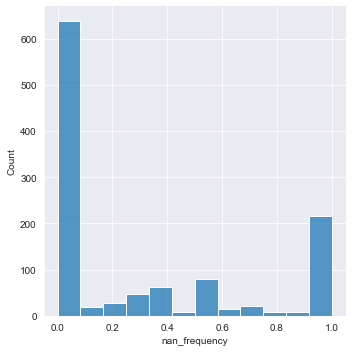

In [21]:
import seaborn as sns

plot = sns.displot(scores, x="nan_frequency")

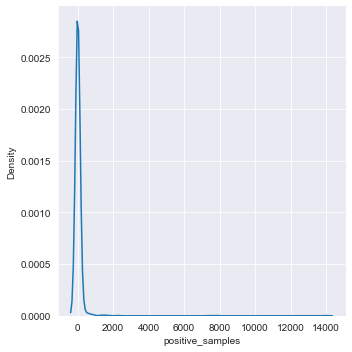

In [22]:
# plot the distribution of number of samples (positive samples)
plot = sns.displot(scores, x="positive_samples", kind="kde")

Most of the samples have very few instances, some a lot. Find a better way to visualize this.

In [23]:
# get number of instances with > 1000 samples
len(scores[scores['positive_samples'] > 1000])

8

In [24]:
len(scores[scores['positive_samples'] > 500])

18

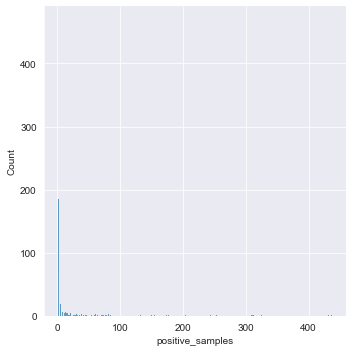

In [25]:
# plot distribution with samples < 500
plot = sns.displot(scores[scores['positive_samples'] < 500], x="positive_samples")

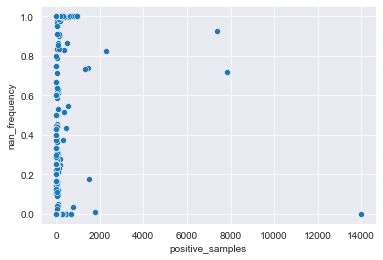

In [26]:
# plot positive_samples vs nan_frequency
plot = sns.scatterplot(data=scores, x="positive_samples", y="nan_frequency")

In [27]:
# get number of instances with > 100 samples
len(scores[scores['positive_samples'] > 100])

# I'll only use those.

57

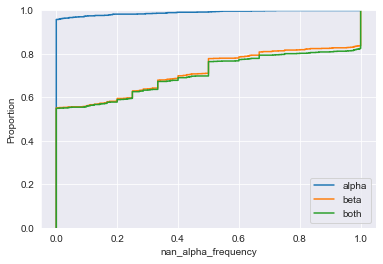

In [28]:
import matplotlib.pyplot as plt

# plot nan_frequency alpha and beta on same displot (kind=ecdf)
# all in same plot
# copilot didn't get it, so I used chatgpt with following question:
# How do I plot multiple displot figures (with kind="ecdf", so the plots are lines) on the same graph in seaborn with a legend?

fig, ax = plt.subplots()
sns.ecdfplot(data=scores, x="nan_alpha_frequency", ax=ax, label="alpha")
sns.ecdfplot(data=scores, x="nan_beta_frequency", ax=ax, label="beta")
sns.ecdfplot(data=scores, x="nan_frequency", ax=ax, label="both")
ax.legend()

alpha clearly has a lot less NaN's than beta.

Let's search epitopes with alpha and beta Nan frequencies in different classes.

In [29]:
def get_class(number):
    if number > 0.95:
        return "very high"
    elif number > 0.75:
        return "high"
    elif number > 0.25:
        return "medium"
    elif number > 0.05:
        return "low"
    else:
        return "very low"

In [30]:
# only keep epitopes without 100% NaNs (since we test always on our complete dataset)
# let's say it needs to be beloow 80% to still assure a decent amount of test samples
print(f"Before: {len(scores)}")
scores = scores[scores['nan_frequency'] < 0.8]
print(f"After: {len(scores)}")

Before: 1150
After: 922


In [31]:
print(f"Before: {len(scores)}")
scores = scores[scores['positive_samples'] > 100]
print(f"After: {len(scores)}")

scores['nan_alpha_frequency_class'] = scores['nan_alpha_frequency'].apply(get_class)
scores['nan_beta_frequency_class'] = scores['nan_beta_frequency'].apply(get_class)
scores['nan_frequency_class'] = scores['nan_frequency'].apply(get_class)
scores

Before: 922
After: 22


,epitope,nan_frequency,nan_alpha_frequency,nan_beta_frequency,positive_samples,nan_alpha_frequency_class,nan_beta_frequency_class,nan_frequency_class
52,GILGFVFTL,0.719796,0.329502,0.390294,7830.0,medium,medium,medium
74,GLCTLVAML,0.739576,0.028708,0.710868,1463.0,very low,medium,medium
75,SSLENFRAYV,0.000000,0.000000,0.000000,437.0,very low,very low,very low
151,ASNENMETM,0.000000,0.000000,0.000000,325.0,very low,very low,very low
185,YLQPRTFLL,0.730769,0.315234,0.415535,1326.0,medium,medium,medium
197,LLWNGPMAV,0.544280,0.158672,0.385609,542.0,low,medium,medium
239,CINGVCWTV,0.435484,0.018433,0.417051,434.0,very low,medium,medium
240,RAKFKQLL,0.175567,0.000000,0.175567,1498.0,very low,low,low
241,AVFDRKSDAK,0.010101,0.000000,0.010101,1782.0,very low,very low,very low
242,IVTDFSVIK,0.036988,0.000000,0.036988,757.0,very low,very low,very low


In [32]:
scores.sample(len(scores))

,epitope,nan_frequency,nan_alpha_frequency,nan_beta_frequency,positive_samples,nan_alpha_frequency_class,nan_beta_frequency_class,nan_frequency_class
345,LSLRNPILV,0.000000,0.000000,0.000000,155.0,very low,very low,very low
52,GILGFVFTL,0.719796,0.329502,0.390294,7830.0,medium,medium,medium
239,CINGVCWTV,0.435484,0.018433,0.417051,434.0,very low,medium,medium
151,ASNENMETM,0.000000,0.000000,0.000000,325.0,very low,very low,very low
437,SPRWYFYYL,0.372168,0.058252,0.313916,309.0,low,medium,medium
352,DATYQRTRALVR,0.232394,0.091549,0.140845,142.0,low,low,low
241,AVFDRKSDAK,0.010101,0.000000,0.010101,1782.0,very low,very low,very low
343,HGIRNASFI,0.000000,0.000000,0.000000,288.0,very low,very low,very low
306,KLGGALQAK,0.000000,0.000000,0.000000,13974.0,very low,very low,very low
255,SSPPMFRV,0.516320,0.000000,0.516320,337.0,very low,medium,medium


In [33]:
# get the unique classes  combinations and their counts
groups = scores.groupby(['nan_alpha_frequency_class', 'nan_beta_frequency_class', 'nan_frequency_class']).size()
groups

nan_alpha_frequency_class  nan_beta_frequency_class  nan_frequency_class
low                        low                       low                     2
                           medium                    medium                  2
medium                     medium                    medium                  2
very low                   low                       low                     1
                           medium                    medium                  4
                           very low                  very low               11
dtype: int64

In [34]:
# get all groups with more than 3 counts
MIN_IN_GROUP = 1
groups[groups >= MIN_IN_GROUP]

nan_alpha_frequency_class  nan_beta_frequency_class  nan_frequency_class
low                        low                       low                     2
                           medium                    medium                  2
medium                     medium                    medium                  2
very low                   low                       low                     1
                           medium                    medium                  4
                           very low                  very low               11
dtype: int64

In [35]:
# sample one epitope for each of the groups
epitopes = []
for group in groups[groups >= MIN_IN_GROUP].index:
    group_epitopes = scores[
        (scores['nan_alpha_frequency_class'] == group[0]) & (scores['nan_beta_frequency_class'] == group[1]) & (
                    scores['nan_frequency_class'] == group[2])]
    epitopes.append(group_epitopes.sample(1)['epitope'].values[0])

In [36]:
epitopes

['ATDALMTGF', 'LLWNGPMAV', 'YLQPRTFLL', 'RAKFKQLL', 'GLCTLVAML', 'SSYRRPVGI']

For each of those epitopes, I want to test following models:
- RF (mean imputed)
- RF on the seperate chains (mean imputed, mean combined)
- HistGradientBoosting
- XGBoost


In [37]:
from util import evaluate_cv_no_nan_test

models_to_evaluate = []

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

models_to_evaluate.append({
    'name': 'RF',
    'model': RandomForestClassifier(n_estimators=200),  # TODO? Evaluate effect  of n_estimators
    'drop_train_na': False,
    'imputer': SimpleImputer(strategy='mean'),
})

models_to_evaluate.append({
    'name': 'RF',
    'model': RandomForestClassifier(n_estimators=200),  # TODO? Evaluate effect  of n_estimators
    'drop_train_na': True,
    'imputer': SimpleImputer(strategy='mean'),
})

In [39]:
models_to_evaluate.append({
    'name': 'RF seperate chains',
    'model_alpha': RandomForestClassifier(n_estimators=200),
    'model_beta': RandomForestClassifier(n_estimators=200),
    'imputer': SimpleImputer(strategy='mean'),
    'drop_train_na': False,
    'seperate_chains': True,
})

models_to_evaluate.append({
    'name': 'RF seperate chains',
    'model_alpha': RandomForestClassifier(n_estimators=200),
    'model_beta': RandomForestClassifier(n_estimators=200),
    'imputer': SimpleImputer(strategy='mean'),
    'drop_train_na': True,
    'seperate_chains': True,
})

In [40]:
from sklearn.ensemble import HistGradientBoostingClassifier

models_to_evaluate.append({
    'name': 'HistGradientBoosting',
    'model': HistGradientBoostingClassifier(),
    'drop_train_na': False,
})

models_to_evaluate.append({
    'name': 'HistGradientBoosting',
    'model': HistGradientBoostingClassifier(),
    'drop_train_na': True,
})

In [41]:
from xgboost import XGBClassifier

models_to_evaluate.append({
    'name': 'XGBoost',
    'model': XGBClassifier(),
    'drop_train_na': False,
})

models_to_evaluate.append({
    'name': 'XGBoost',
    'model': XGBClassifier(),
    'drop_train_na': True,
})

In [42]:
from util import get_epitope_df, NotEnoughSamplesException


def get_scores_df_for_epitope(epitope, models_to_evaluate):
    print(f'\nEvaluating eptiope {epitope}...')

    df = get_epitope_df(epitope, silent=True)
    print(f'Epitope has {len(df)} samples')

    model_scores = evaluate_cv_no_nan_test(models_to_evaluate, df)

    # add epitope column
    model_scores['epitope'] = epitope
    model_scores['positive_samples'] = len(df[df['reaction'] == 1])
    model_scores['negative_samples'] = len(df[df['reaction'] == 0])
    model_scores['nan_frequency'] = df.isna().sum().sum() / (df.shape[0] * df.shape[1])
    model_scores['nan_alpha_frequency'] = df['CDR3_alfa'].isna().sum().sum() / (df.shape[0] * df.shape[1])
    model_scores['nan_beta_frequency'] = df['CDR3_beta'].isna().sum().sum() / (df.shape[0] * df.shape[1])

    return model_scores

In [44]:
%%time

from util import evaluate_cv_no_nan_test
import pandas as pd

results = pd.DataFrame()
for epitope in epitopes:
    try:
        epitope_score_df = get_scores_df_for_epitope(epitope, models_to_evaluate)

        # print(epitope_score_df)
        results = pd.concat([results, epitope_score_df])
    # except AssertionError:
    #     pass
    # except NotImplementedError:
    #     pass
    except Exception as e:
        print(f'Error evaluating epitope {epitope}: {e}')
        raise e

results


Evaluating eptiope ATDALMTGF...
Number of negative samples changed from 59878 to 59840 (because of overlap with positive samples)
Epitope has 354 samples
AUC(m=RF, s=0, train_na=1): 0.8165217391304348
AUC(m=RF, s=0, train_na=0): 0.8243478260869564
AUC(m=RF seperate chains, s=0, train_na=1): 0.888695652173913
AUC(m=RF seperate chains, s=0, train_na=0): 0.8591304347826088
AUC(m=HistGradientBoosting, s=0, train_na=1): 0.817391304347826
AUC(m=HistGradientBoosting, s=0, train_na=0): 0.7999999999999998
AUC(m=XGBoost, s=0, train_na=1): 0.8139130434782609
AUC(m=XGBoost, s=0, train_na=0): 0.808695652173913
AUC(m=RF, s=1, train_na=1): 0.8631578947368421
AUC(m=RF, s=1, train_na=0): 0.8535087719298246
AUC(m=RF seperate chains, s=1, train_na=1): 0.9008771929824562
AUC(m=RF seperate chains, s=1, train_na=0): 0.8736842105263158
AUC(m=HistGradientBoosting, s=1, train_na=1): 0.8473684210526317
AUC(m=HistGradientBoosting, s=1, train_na=0): 0.8280701754385965
AUC(m=XGBoost, s=1, train_na=1): 0.831578947

,model,auc,drop_train_na,epitope,positive_samples,negative_samples,nan_frequency,nan_alpha_frequency,nan_beta_frequency
0,RF,0.816522,False,ATDALMTGF,177,177,0.121092,0.011676,0.004896
1,RF,0.824348,True,ATDALMTGF,177,177,0.121092,0.011676,0.004896
2,RF seperate chains,0.888696,False,ATDALMTGF,177,177,0.121092,0.011676,0.004896
3,RF seperate chains,0.859130,True,ATDALMTGF,177,177,0.121092,0.011676,0.004896
4,HistGradientBoosting,0.817391,False,ATDALMTGF,177,177,0.121092,0.011676,0.004896
...,...,...,...,...,...,...,...,...,...
35,RF seperate chains,0.994460,True,SSYRRPVGI,661,661,0.005446,0.000000,0.000000
36,HistGradientBoosting,0.986899,False,SSYRRPVGI,661,661,0.005446,0.000000,0.000000
37,HistGradientBoosting,0.985552,True,SSYRRPVGI,661,661,0.005446,0.000000,0.000000
38,XGBoost,0.985308,False,SSYRRPVGI,661,661,0.005446,0.000000,0.000000


In [45]:
# Debugging cell, runs on it's own (but might contain duplicate code)

""""

from util import evaluate_cv_no_nan_test, get_scores_df_for_epitope
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

epitopes = ['DATYQRTRALVR']

models_to_evaluate = []

models_to_evaluate.append({
    'name': 'RF seperate chains',
    'model_alpha': RandomForestClassifier(n_estimators=200),
    'model_beta': RandomForestClassifier(n_estimators=200),
    'imputer': SimpleImputer(strategy='mean'),
    'drop_train_na': False,
    'seperate_chains': True,
})

models_to_evaluate.append({
    'name': 'RF seperate chains',
    'model_alpha': RandomForestClassifier(n_estimators=200),
    'model_beta': RandomForestClassifier(n_estimators=200),
    'imputer': SimpleImputer(strategy='mean'),
    'drop_train_na': True,
    'seperate_chains': True,
})

results = pd.DataFrame()
for epitope in epitopes:
    try:
        epitope_score_df = get_scores_df_for_epitope(epitope, models_to_evaluate)
        print(epitope_score_df)
        results = pd.concat([results, epitope_score_df])
    # except AssertionError:
    #     pass
    # except NotImplementedError:
    #     pass
    except Exception as e:
        print(f'Error evaluating epitope {epitope}: {e}')
        raise e

results

"""

'"\n\nfrom util import evaluate_cv_no_nan_test, get_scores_df_for_epitope\nimport pandas as pd\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.impute import SimpleImputer\n\nepitopes = [\'DATYQRTRALVR\']\n\nmodels_to_evaluate = []\n\nmodels_to_evaluate.append({\n    \'name\': \'RF seperate chains\',\n    \'model_alpha\': RandomForestClassifier(n_estimators=200),\n    \'model_beta\': RandomForestClassifier(n_estimators=200),\n    \'imputer\': SimpleImputer(strategy=\'mean\'),\n    \'drop_train_na\': False,\n    \'seperate_chains\': True,\n})\n\nmodels_to_evaluate.append({\n    \'name\': \'RF seperate chains\',\n    \'model_alpha\': RandomForestClassifier(n_estimators=200),\n    \'model_beta\': RandomForestClassifier(n_estimators=200),\n    \'imputer\': SimpleImputer(strategy=\'mean\'),\n    \'drop_train_na\': True,\n    \'seperate_chains\': True,\n})\n\nresults = pd.DataFrame()\nfor epitope in epitopes:\n    try:\n        epitope_score_df = get_scores_df_for_epitope(e

In [46]:
all_scores = scores.copy()

In [47]:
import seaborn as sns

scores = results[results['drop_train_na'] == False]

baseline = scores[scores['model'] == 'RF']['auc'].mean()
scores["improvement"] = scores["auc"] - baseline

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/3235739344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


Text(0.5, 1.0, 'Model performance per epitope, train data with NaNs')

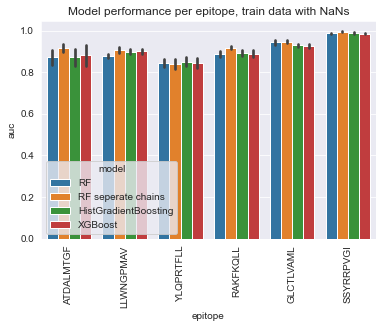

In [48]:
plot = sns.barplot(x="epitope", y="auc", data=scores, ci="sd", hue="model")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title(f'Model performance per epitope, train data with NaNs')

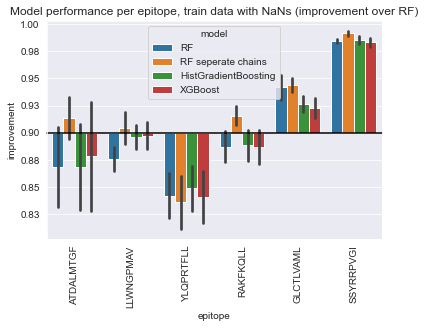

In [49]:
plot = sns.barplot(x="epitope", y="improvement", data=scores, ci="sd", hue="model")

plot.set_title(f'Model performance per epitope, train data with NaNs (improvement over RF)')

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plot.axhline(0, color="k", clip_on=False)
y_ticks = plot.get_yticks()
plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])
pass

In [50]:
# only look at the first epitopee
scores = results[results['epitope'] == epitopes[0]]
baseline = scores[scores['model'] == 'RF']['auc'].mean()
scores["improvement"] = scores["auc"] - baseline

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/4085934249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


Text(0.5, 1.0, 'Difference in using train data or not, for epitope ATDALMTGF')

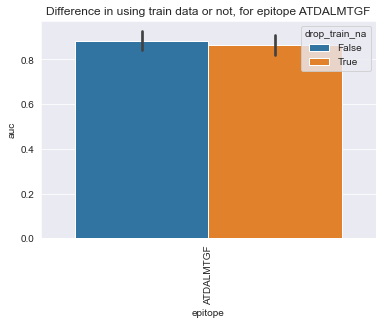

In [51]:
plot = sns.barplot(x="epitope", y="auc", data=scores, ci="sd", hue="drop_train_na")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title(f'Difference in using train data or not, for epitope {epitopes[0]}')

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/3168909980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


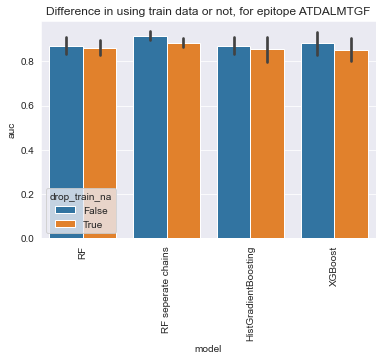

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/3168909980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


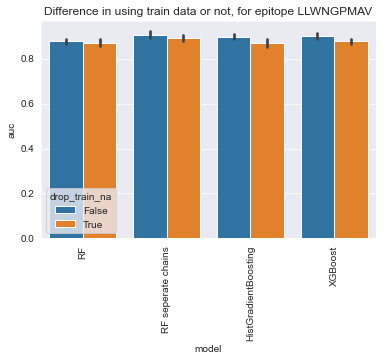

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/3168909980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


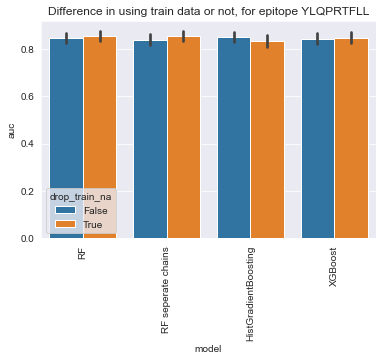

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/3168909980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


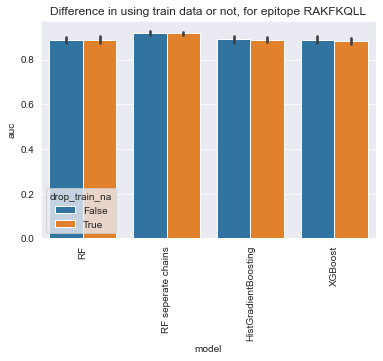

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/3168909980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


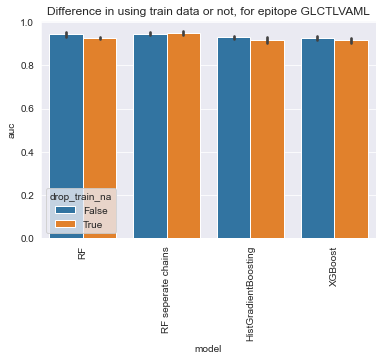

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/3168909980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


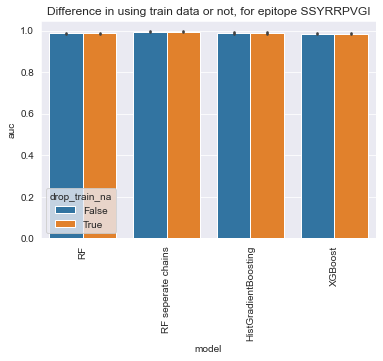

In [52]:
# matplotlib
import matplotlib.pyplot as plt

for epitope in epitopes:
    try:
        scores = results[results['epitope'] == epitope]
        baseline = scores[scores['model'] == 'RF']['auc'].mean()
        scores["improvement"] = scores["auc"] - baseline

        plot = sns.barplot(x="model", y="auc", data=scores, ci="sd", hue="drop_train_na")
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
        plot.set_title(f'Difference in using train data or not, for epitope {epitope}')
        # plot.figure.savefig(f'plots/{epitope}.png')
        plt.show()
        plot.figure.clf()
    except Exception as e:
        print(f'Error evaluating epitope {epitope}: {e}')
        pass

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/420129418.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


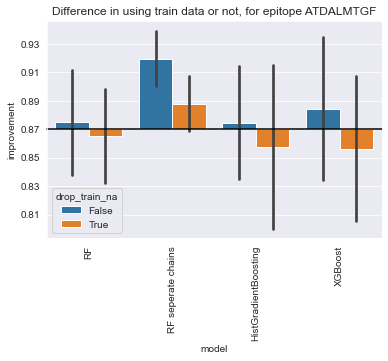

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/420129418.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


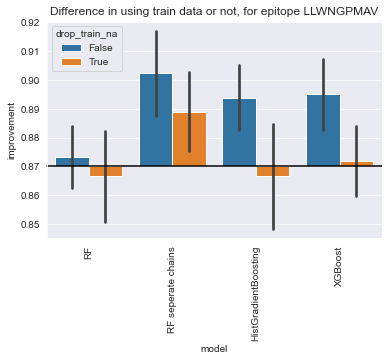

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/420129418.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


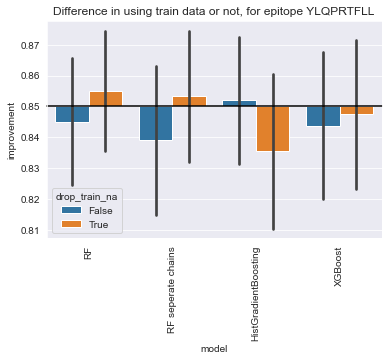

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/420129418.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


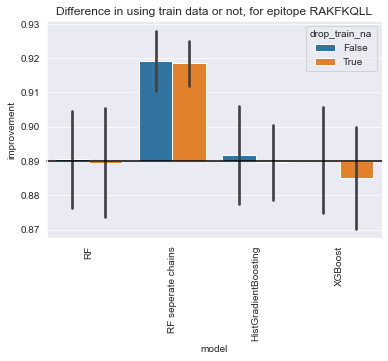

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/420129418.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


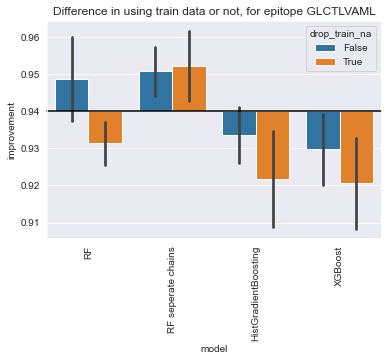

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/420129418.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


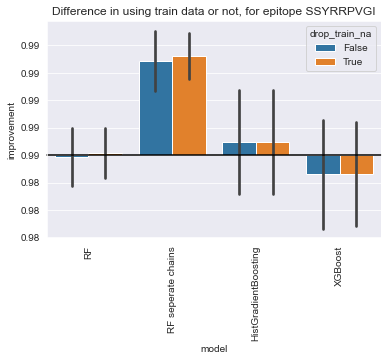

In [53]:
# matplotlib
import matplotlib.pyplot as plt

for epitope in epitopes:
    try:
        scores = results[results['epitope'] == epitope]
        baseline = scores[scores['model'] == 'RF']['auc'].mean()
        scores["improvement"] = scores["auc"] - baseline

        plot = sns.barplot(x="model", y="improvement", data=scores, ci="sd", hue="drop_train_na")
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
        plot.set_title(f'Difference in using train data or not, for epitope {epitope}')
        plot.axhline(0, color="k", clip_on=False)
        y_ticks = plot.get_yticks()
        plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])

        # plot.figure.savefig(f'plots/{epitope}.png')
        plt.show()
        plot.figure.clf()
    except Exception as e:
        print(f'Error evaluating epitope {epitope}: {e}')
        pass

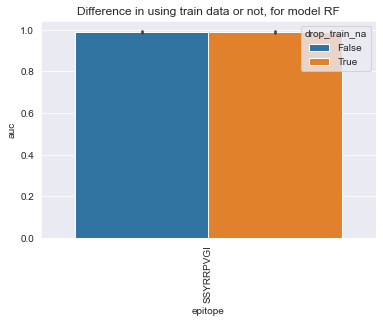

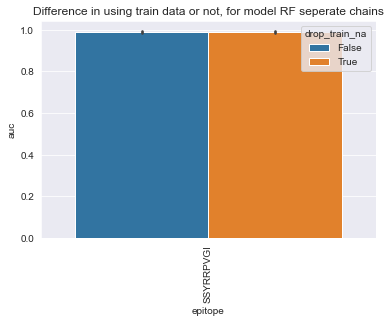

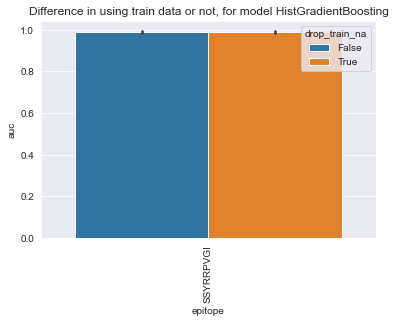

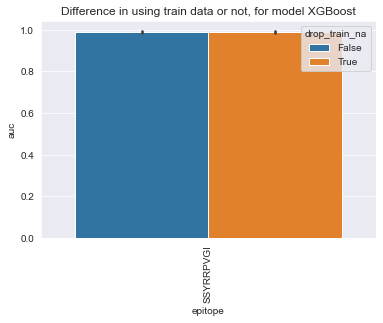

In [54]:
models_unique = results['model'].unique()
for model in models_unique:
    plot = sns.barplot(x="epitope", y="auc", data=scores, ci="sd", hue="drop_train_na")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(f'Difference in using train data or not, for model {model}')

    plt.show()
    plot.figure.clf()

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/2836627891.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


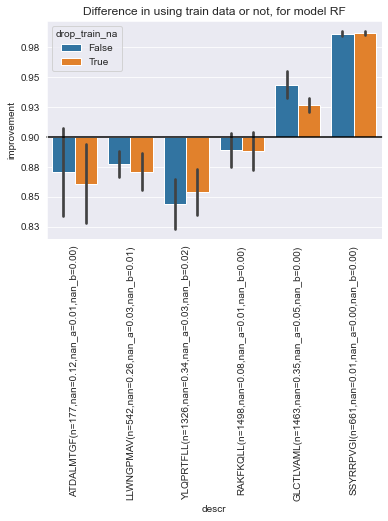

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/2836627891.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


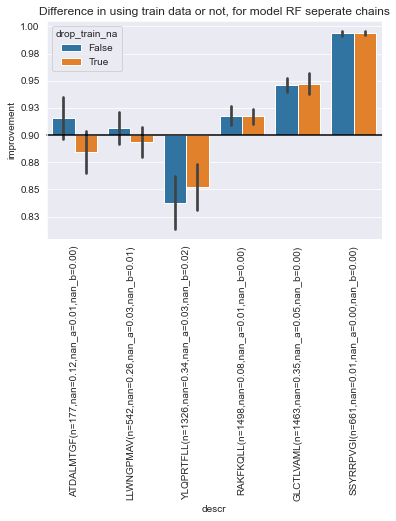

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/2836627891.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


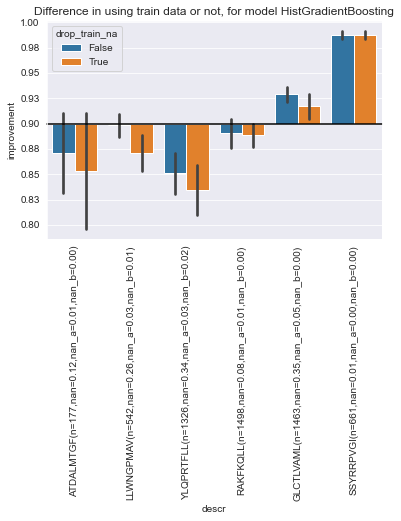

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/2836627891.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


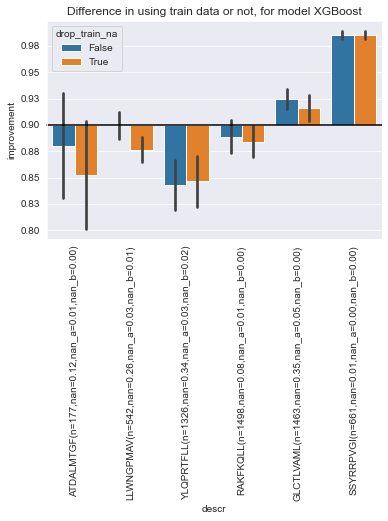

In [57]:
models_unique = results['model'].unique()

baseline = results[results['model'] == 'RF']['auc'].mean()

# create a column with the descr format f'{epitope}(n={n},nan={nan},nan_a={nan_a},nan_b={nan_b})'
results['descr'] = results.apply(lambda
                                     row: f'{row["epitope"]}(n={row["positive_samples"]},nan={row["nan_frequency"]:.2f},nan_a={row["nan_alpha_frequency"]:.2f},nan_b={row["nan_beta_frequency"]:.2f})',
                                 axis=1)

for model in models_unique:
    scores = results[results['model'] == model]
    scores["improvement"] = scores["auc"] - baseline

    plot = sns.barplot(x="descr", y="improvement", data=scores, ci="sd", hue="drop_train_na")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(f'Difference in using train data or not, for model {model}')
    plot.axhline(0, color="k", clip_on=False)
    y_ticks = plot.get_yticks()
    plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])

    plt.show()
    plot.figure.clf()
    pass

C:\Users\arnod\AppData\Local\Temp/ipykernel_12516/3996632601.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline


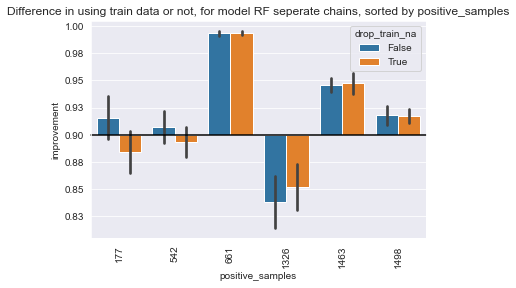

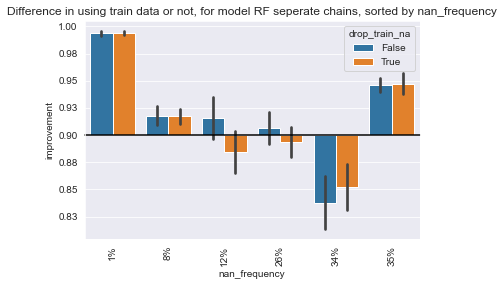

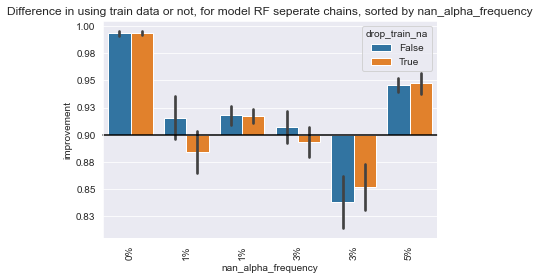

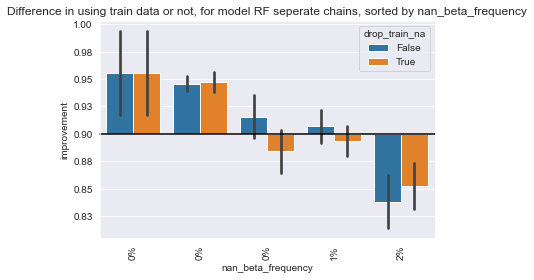

In [59]:
baseline = results[results['model'] == 'RF']['auc'].mean()

model = "RF seperate chains"

scores = results[results['model'] == model]
scores["improvement"] = scores["auc"] - baseline

for x in ['positive_samples', 'nan_frequency', 'nan_alpha_frequency', 'nan_beta_frequency']:
    plot = sns.barplot(x=x, y="improvement", data=scores, ci="sd", hue="drop_train_na")
    # change label to percentages
    # check if x is float
    if scores[x].dtype == 'float64' or scores[x].dtype == 'float32':
        plot.set_xticklabels([f"{float(x._text):.0%}" for x in plot.get_xticklabels()])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(f'Difference in using train data or not, for model {model}, sorted by {x}')
    plot.axhline(0, color="k", clip_on=False)
    y_ticks = plot.get_yticks()
    plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])

    plt.show()
    plot.figure.clf()
    pass

There seems to be a clear correelation for beta frequency.

In [ ]:
# TODO: sort on avg auc; use diff as y

# Trend analysis
We've seen this trend in this small subset of the database. Let's see if it holds for the whole database.

In [60]:
import pandas as pd
from tqdm import tqdm
from util import get_counts, filter_df

df_vdjdb = pd.read_csv('data/vdjdb-2022-03-30/vdjdb_full.txt', sep='\t')
df_vdjdb.head()
rename_columns = {
    'antigen.epitope': 'epitope',
    'cdr3.alpha': 'CDR3_alfa',
    'v.alpha': 'TRAV',
    'j.alpha': 'TRAJ',
    'cdr3.beta': 'CDR3_beta',
    'v.beta': 'TRBV',
    'j.beta': 'TRBJ',
}

df_vdjdb = df_vdjdb.rename(columns=rename_columns)
df_vdjdb = df_vdjdb[rename_columns.values()]

In [61]:
%%time
unique_epitopes = df_vdjdb['epitope'].unique()

scores = pd.DataFrame()
for epitope in tqdm(unique_epitopes, total=len(unique_epitopes)):
    positive_samples = df_vdjdb[df_vdjdb['epitope'] == epitope]
    alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos = get_counts(positive_samples)

    complete = both_count_pos
    incomplete = alpha_only_count_pos + beta_only_count_pos + non_count_pos

    total = complete + incomplete

    nan_frequency = incomplete / total

    nan_alpha_frequency = alpha_only_count_pos / total
    nan_beta_frequency = beta_only_count_pos / total

    index = len(scores)
    scores.loc[index, 'epitope'] = epitope
    scores.loc[index, 'nan_frequency'] = nan_frequency
    scores.loc[index, 'nan_alpha_frequency'] = nan_alpha_frequency
    scores.loc[index, 'nan_beta_frequency'] = nan_beta_frequency
    scores.loc[index, 'positive_samples'] = len(positive_samples)

100%|██████████| 1150/1150 [00:05<00:00, 214.00it/s]

Wall time: 5.38 s


In [62]:
print(f"Total: {len(scores)}")
print(f"Nan frequency < 0.8: {len(scores[scores['nan_frequency'] < 0.8])}")
print(f"Positive samples > 100: {len(scores[scores['positive_samples'] > 100])}")
print(f"Positive samples > 100 and positive samples < 1000: {len(scores[(scores['positive_samples'] > 100) & (scores['positive_samples'] < 1000)])}")


scores = scores[scores['nan_frequency'] < 0.8]
scores = scores[(scores['positive_samples'] > 100)]
scores = scores[(scores['positive_samples'] < 1000)] # for efficiency
print(f"After: {len(scores)}")

Total: 1150
Nan frequency < 0.8: 922
Positive samples > 100: 57
Positive samples > 100 and positive samples < 1000: 49
After: 16


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

models_to_evaluate = []

models_to_evaluate.append({
    'name': 'RF seperate chains',
    'model_alpha': RandomForestClassifier(n_estimators=200),
    'model_beta': RandomForestClassifier(n_estimators=200),
    'imputer': SimpleImputer(strategy='mean'),
    'drop_train_na': False,
    'seperate_chains': True,
})

models_to_evaluate.append({
    'name': 'RF seperate chains',
    'model_alpha': RandomForestClassifier(n_estimators=200),
    'model_beta': RandomForestClassifier(n_estimators=200),
    'imputer': SimpleImputer(strategy='mean'),
    'drop_train_na': True,
    'seperate_chains': True,
})

In [64]:
%%time

from pandas.errors import DtypeWarning
from util import evaluate_cv_no_nan_test, get_scores_df_for_epitope
import pandas as pd

# ignore the dtype and fitted with header warnings
from warnings import simplefilter
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DtypeWarning)

results = pd.DataFrame()

epitopes = scores['epitope'].unique()
# reverse the order
# epitopes = epitopes[::-1]
for epitope in tqdm(epitopes):
    try:
        epitope_score_df = get_scores_df_for_epitope(epitope, models_to_evaluate)
        # print(epitope_score_df)
        results = pd.concat([results, epitope_score_df])
    except Exception as e:
        print(f'Error evaluating epitope {epitope}: {e}')
        raise e

results

  0%|          | 0/16 [00:00<?, ?it/s]


Evaluating eptiope SSLENFRAYV...
Number of negative samples changed from 59618 to 59159 (because of overlap with positive samples)
Epitope has 874 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9974305555555555
AUC(m=RF seperate chains, s=0, train_na=0): 0.9972916666666667
AUC(m=RF seperate chains, s=1, train_na=1): 0.9793814432989691
AUC(m=RF seperate chains, s=1, train_na=0): 0.9823070493173587
AUC(m=RF seperate chains, s=2, train_na=1): 0.9864570573023003
AUC(m=RF seperate chains, s=2, train_na=0): 0.9835306927997822
AUC(m=RF seperate chains, s=3, train_na=1): 0.9912056928034372
AUC(m=RF seperate chains, s=3, train_na=0): 0.9924140708915146
AUC(m=RF seperate chains, s=4, train_na=1): 0.9925137362637364


  6%|▋         | 1/16 [00:33<08:26, 33.74s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9910027472527473

Evaluating eptiope ASNENMETM...
Number of negative samples changed from 59730 to 59382 (because of overlap with positive samples)
Epitope has 650 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9835644581407293
AUC(m=RF seperate chains, s=0, train_na=0): 0.9818952234206472
AUC(m=RF seperate chains, s=1, train_na=1): 0.990238336713996
AUC(m=RF seperate chains, s=1, train_na=0): 0.9903651115618661
AUC(m=RF seperate chains, s=2, train_na=1): 0.983707264957265
AUC(m=RF seperate chains, s=2, train_na=0): 0.9794337606837606
AUC(m=RF seperate chains, s=3, train_na=1): 0.991729128973895
AUC(m=RF seperate chains, s=3, train_na=0): 0.9901783406565003
AUC(m=RF seperate chains, s=4, train_na=1): 0.9908925318761385


 12%|█▎        | 2/16 [00:55<06:15, 26.83s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9863387978142077

Evaluating eptiope LLWNGPMAV...
Number of negative samples changed from 59513 to 59231 (because of overlap with positive samples)
Epitope has 1084 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8962222222222221
AUC(m=RF seperate chains, s=0, train_na=0): 0.8835555555555555
AUC(m=RF seperate chains, s=1, train_na=1): 0.933084686265906
AUC(m=RF seperate chains, s=1, train_na=0): 0.9056603773584906
AUC(m=RF seperate chains, s=2, train_na=1): 0.910411622276029
AUC(m=RF seperate chains, s=2, train_na=0): 0.9096045197740112
AUC(m=RF seperate chains, s=3, train_na=1): 0.9055555555555556
AUC(m=RF seperate chains, s=3, train_na=0): 0.8886363636363637
AUC(m=RF seperate chains, s=4, train_na=1): 0.9150349650349651


 19%|█▉        | 3/16 [01:32<06:49, 31.52s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9003496503496504

Evaluating eptiope CINGVCWTV...
Number of negative samples changed from 59621 to 59492 (because of overlap with positive samples)
Epitope has 868 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9442985746436611
AUC(m=RF seperate chains, s=0, train_na=0): 0.9311702925731433
AUC(m=RF seperate chains, s=1, train_na=1): 0.9365
AUC(m=RF seperate chains, s=1, train_na=0): 0.90875
AUC(m=RF seperate chains, s=2, train_na=1): 0.88796768707483
AUC(m=RF seperate chains, s=2, train_na=0): 0.8854166666666667
AUC(m=RF seperate chains, s=3, train_na=1): 0.9132
AUC(m=RF seperate chains, s=3, train_na=0): 0.8962
AUC(m=RF seperate chains, s=4, train_na=1): 0.9484020023103581


 25%|██▌       | 4/16 [02:04<06:17, 31.43s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.931651906045437

Evaluating eptiope IVTDFSVIK...
Number of negative samples changed from 59298 to 55580 (because of overlap with positive samples)
Epitope has 1514 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.7501085540599218
AUC(m=RF seperate chains, s=0, train_na=0): 0.7639552274810633
AUC(m=RF seperate chains, s=1, train_na=1): 0.7856646825396826
AUC(m=RF seperate chains, s=1, train_na=0): 0.7963293650793651
AUC(m=RF seperate chains, s=2, train_na=1): 0.7420661553211889
AUC(m=RF seperate chains, s=2, train_na=0): 0.7390220517737297
AUC(m=RF seperate chains, s=3, train_na=1): 0.7776690221543162
AUC(m=RF seperate chains, s=3, train_na=0): 0.7848309778456837
AUC(m=RF seperate chains, s=4, train_na=1): 0.7452342178369575


 31%|███▏      | 5/16 [03:25<09:03, 49.41s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.7479643644027205

Evaluating eptiope SSPPMFRV...
Number of negative samples changed from 59718 to 59626 (because of overlap with positive samples)
Epitope has 674 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9808006535947712
AUC(m=RF seperate chains, s=0, train_na=0): 0.9685457516339869
AUC(m=RF seperate chains, s=1, train_na=1): 0.9570707070707071
AUC(m=RF seperate chains, s=1, train_na=0): 0.9381313131313131
AUC(m=RF seperate chains, s=2, train_na=1): 0.998193315266486
AUC(m=RF seperate chains, s=2, train_na=0): 0.998193315266486
AUC(m=RF seperate chains, s=3, train_na=1): 0.9951219512195122
AUC(m=RF seperate chains, s=3, train_na=0): 0.9868292682926829
AUC(m=RF seperate chains, s=4, train_na=1): 0.9444444444444444


 38%|███▊      | 6/16 [03:45<06:34, 39.49s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9354838709677419

Evaluating eptiope KSKRTPMGF...
Number of negative samples changed from 59881 to 59842 (because of overlap with positive samples)
Epitope has 348 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8934294871794872
AUC(m=RF seperate chains, s=0, train_na=0): 0.8717948717948718
AUC(m=RF seperate chains, s=1, train_na=1): 0.9506172839506173
AUC(m=RF seperate chains, s=1, train_na=0): 0.8783068783068783
AUC(m=RF seperate chains, s=2, train_na=1): 0.9095652173913044
AUC(m=RF seperate chains, s=2, train_na=0): 0.9052173913043479
AUC(m=RF seperate chains, s=3, train_na=1): 0.8914956011730205
AUC(m=RF seperate chains, s=3, train_na=0): 0.8621700879765396
AUC(m=RF seperate chains, s=4, train_na=1): 0.9017857142857143


 44%|████▍     | 7/16 [03:56<04:31, 30.15s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.8504464285714286

Evaluating eptiope ATDALMTGF...
Number of negative samples changed from 59878 to 59840 (because of overlap with positive samples)
Epitope has 354 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8956521739130435
AUC(m=RF seperate chains, s=0, train_na=0): 0.8782608695652173
AUC(m=RF seperate chains, s=1, train_na=1): 0.9017543859649123
AUC(m=RF seperate chains, s=1, train_na=0): 0.8771929824561403
AUC(m=RF seperate chains, s=2, train_na=1): 0.9090909090909092
AUC(m=RF seperate chains, s=2, train_na=0): 0.8735795454545455
AUC(m=RF seperate chains, s=3, train_na=1): 0.9308755760368663
AUC(m=RF seperate chains, s=3, train_na=0): 0.890168970814132
AUC(m=RF seperate chains, s=4, train_na=1): 0.9169960474308301


 50%|█████     | 8/16 [04:07<03:11, 23.94s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9209486166007905

Evaluating eptiope RLRAEAQVK...
Number of negative samples changed from 59624 to 57246 (because of overlap with positive samples)
Epitope has 862 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.6277387640449438
AUC(m=RF seperate chains, s=0, train_na=0): 0.6381320224719101
AUC(m=RF seperate chains, s=1, train_na=1): 0.5787561755303691
AUC(m=RF seperate chains, s=1, train_na=0): 0.5895815170008718
AUC(m=RF seperate chains, s=2, train_na=1): 0.6595361567271679
AUC(m=RF seperate chains, s=2, train_na=0): 0.670916162489196
AUC(m=RF seperate chains, s=3, train_na=1): 0.7087172218284905
AUC(m=RF seperate chains, s=3, train_na=0): 0.7288447909284196
AUC(m=RF seperate chains, s=4, train_na=1): 0.7030101262311


 56%|█████▋    | 9/16 [04:46<03:22, 28.88s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.6830350950201138

Evaluating eptiope HGIRNASFI...
Number of negative samples changed from 59767 to 59561 (because of overlap with positive samples)
Epitope has 576 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9836734693877551
AUC(m=RF seperate chains, s=0, train_na=0): 0.9797488226059655
AUC(m=RF seperate chains, s=1, train_na=1): 0.9786283891547048
AUC(m=RF seperate chains, s=1, train_na=0): 0.9757575757575757
AUC(m=RF seperate chains, s=2, train_na=1): 0.9841197822141561
AUC(m=RF seperate chains, s=2, train_na=0): 0.9832123411978222
AUC(m=RF seperate chains, s=3, train_na=1): 0.9766470770182493
AUC(m=RF seperate chains, s=3, train_na=0): 0.9761831116609959
AUC(m=RF seperate chains, s=4, train_na=1): 0.9846405228758169


 62%|██████▎   | 10/16 [05:06<02:35, 25.92s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.980718954248366

Evaluating eptiope LSLRNPILV...
Number of negative samples changed from 59900 to 59848 (because of overlap with positive samples)
Epitope has 310 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9505747126436782
AUC(m=RF seperate chains, s=0, train_na=0): 0.9477011494252874
AUC(m=RF seperate chains, s=1, train_na=1): 0.9781105990783411
AUC(m=RF seperate chains, s=1, train_na=0): 0.9792626728110598
AUC(m=RF seperate chains, s=2, train_na=1): 0.9333333333333333
AUC(m=RF seperate chains, s=2, train_na=0): 0.9196428571428572
AUC(m=RF seperate chains, s=3, train_na=1): 0.9622222222222222
AUC(m=RF seperate chains, s=3, train_na=0): 0.9522222222222222
AUC(m=RF seperate chains, s=4, train_na=1): 0.962962962962963


 69%|██████▉   | 11/16 [05:16<01:46, 21.25s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.946236559139785

Evaluating eptiope SSYRRPVGI...
Number of negative samples changed from 59394 to 59159 (because of overlap with positive samples)
Epitope has 1322 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9941380935548486
AUC(m=RF seperate chains, s=0, train_na=0): 0.9941970071874632
AUC(m=RF seperate chains, s=1, train_na=1): 0.9909351145038168
AUC(m=RF seperate chains, s=1, train_na=0): 0.9948413645038168
AUC(m=RF seperate chains, s=2, train_na=1): 0.9917391304347826
AUC(m=RF seperate chains, s=2, train_na=0): 0.9934492753623188
AUC(m=RF seperate chains, s=3, train_na=1): 0.997385259013166
AUC(m=RF seperate chains, s=3, train_na=0): 0.9973852590131659
AUC(m=RF seperate chains, s=4, train_na=1): 0.9957759412304867


 75%|███████▌  | 12/16 [06:09<02:02, 30.69s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9951943679216406

Evaluating eptiope DATYQRTRALVR...
Number of negative samples changed from 59913 to 59846 (because of overlap with positive samples)
Epitope has 284 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9064327485380117
AUC(m=RF seperate chains, s=0, train_na=0): 0.8932748538011697
AUC(m=RF seperate chains, s=1, train_na=1): 0.7586956521739131
AUC(m=RF seperate chains, s=1, train_na=0): 0.8043478260869565
AUC(m=RF seperate chains, s=2, train_na=1): 0.8817391304347826
AUC(m=RF seperate chains, s=2, train_na=0): 0.8886956521739131
AUC(m=RF seperate chains, s=3, train_na=1): 0.88
AUC(m=RF seperate chains, s=3, train_na=0): 0.8741176470588234
AUC(m=RF seperate chains, s=4, train_na=1): 0.8287037037037036


 81%|████████▏ | 13/16 [06:18<01:12, 24.17s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.8136574074074074

Evaluating eptiope LTDEMIAQY...
Number of negative samples changed from 59920 to 59866 (because of overlap with positive samples)
Epitope has 270 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.773148148148148
AUC(m=RF seperate chains, s=0, train_na=0): 0.7592592592592593
AUC(m=RF seperate chains, s=1, train_na=1): 0.6525000000000001
AUC(m=RF seperate chains, s=1, train_na=0): 0.6558333333333334
AUC(m=RF seperate chains, s=2, train_na=1): 0.7407407407407407
AUC(m=RF seperate chains, s=2, train_na=0): 0.7415458937198067
AUC(m=RF seperate chains, s=3, train_na=1): 0.833076923076923
AUC(m=RF seperate chains, s=3, train_na=0): 0.8076923076923077
AUC(m=RF seperate chains, s=4, train_na=1): 0.7477272727272727


 88%|████████▊ | 14/16 [06:28<00:39, 19.86s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.7651515151515151

Evaluating eptiope TTDPSFLGRY...
Number of negative samples changed from 59801 to 59615 (because of overlap with positive samples)
Epitope has 508 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.7190319934372437
AUC(m=RF seperate chains, s=0, train_na=0): 0.6804757998359311
AUC(m=RF seperate chains, s=1, train_na=1): 0.7114285714285715
AUC(m=RF seperate chains, s=1, train_na=0): 0.7010204081632653
AUC(m=RF seperate chains, s=2, train_na=1): 0.7274871355060035
AUC(m=RF seperate chains, s=2, train_na=0): 0.7369210977701544
AUC(m=RF seperate chains, s=3, train_na=1): 0.7342641843971631
AUC(m=RF seperate chains, s=3, train_na=0): 0.7333776595744681
AUC(m=RF seperate chains, s=4, train_na=1): 0.6282679738562091


 94%|█████████▍| 15/16 [06:46<00:19, 19.42s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.6350081699346405

Evaluating eptiope SPRWYFYYL...
Number of negative samples changed from 59746 to 59690 (because of overlap with positive samples)
Epitope has 618 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.888454861111111
AUC(m=RF seperate chains, s=0, train_na=0): 0.8546006944444444
AUC(m=RF seperate chains, s=1, train_na=1): 0.8396164021164022
AUC(m=RF seperate chains, s=1, train_na=0): 0.8075396825396824
AUC(m=RF seperate chains, s=2, train_na=1): 0.8746345029239766
AUC(m=RF seperate chains, s=2, train_na=0): 0.859283625730994
AUC(m=RF seperate chains, s=3, train_na=1): 0.8722222222222222
AUC(m=RF seperate chains, s=3, train_na=0): 0.8303418803418804
AUC(m=RF seperate chains, s=4, train_na=1): 0.8863281249999999


100%|██████████| 16/16 [07:05<00:00, 26.62s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.8386718750000001
Wall time: 7min 5s


,model,auc,drop_train_na,epitope
0,RF seperate chains,0.997431,False,SSLENFRAYV
1,RF seperate chains,0.997292,True,SSLENFRAYV
2,RF seperate chains,0.979381,False,SSLENFRAYV
3,RF seperate chains,0.982307,True,SSLENFRAYV
4,RF seperate chains,0.986457,False,SSLENFRAYV
...,...,...,...,...
5,RF seperate chains,0.859284,True,SPRWYFYYL
6,RF seperate chains,0.872222,False,SPRWYFYYL
7,RF seperate chains,0.830342,True,SPRWYFYYL
8,RF seperate chains,0.886328,False,SPRWYFYYL


In [65]:
unique_epitopes = results['epitope'].unique()

for epitope in tqdm(unique_epitopes, total=len(unique_epitopes)):
    positive_samples = df_vdjdb[df_vdjdb['epitope'] == epitope]
    alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos = get_counts(positive_samples)

    complete = both_count_pos
    incomplete = alpha_only_count_pos + beta_only_count_pos + non_count_pos

    total = complete + incomplete

    nan_frequency = incomplete / total

    nan_alpha_frequency = alpha_only_count_pos / total
    nan_beta_frequency = beta_only_count_pos / total

    # assign it everywhere in results for this epitope
    results.loc[results['epitope'] == epitope, 'nan_frequency'] = nan_frequency
    results.loc[results['epitope'] == epitope, 'nan_alpha_frequency'] = nan_alpha_frequency
    results.loc[results['epitope'] == epitope, 'nan_beta_frequency'] = nan_beta_frequency
    results.loc[results['epitope'] == epitope, 'positive_samples'] = len(positive_samples)

100%|██████████| 16/16 [00:00<00:00, 197.46it/s]


In [66]:
results.to_csv('outputs/epitope_trend_rf_sep.csv', index=False)

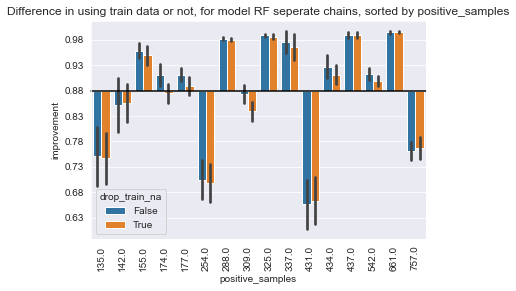

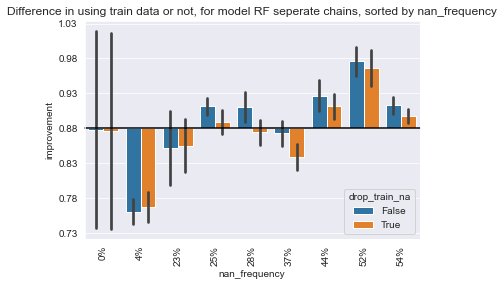

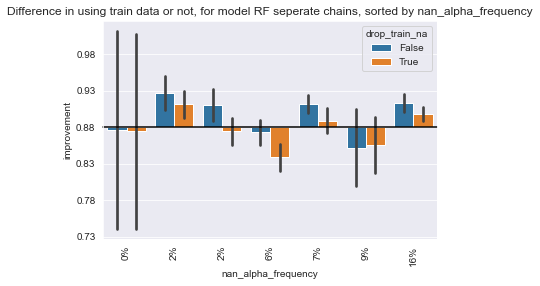

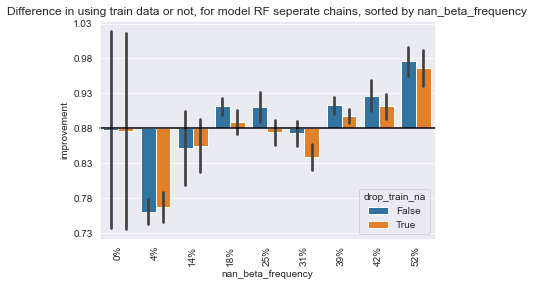

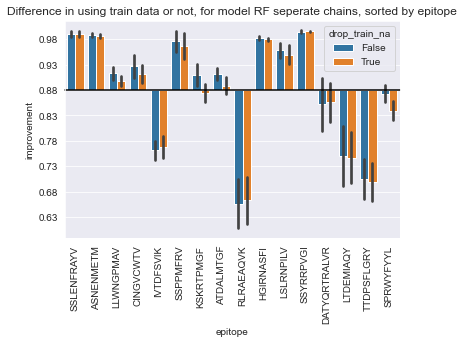

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

baseline = results['auc'].mean() # no baseline, just the mean of all scores

model = "RF seperate chains"

scores = results[results['model'] == model]
scores["improvement"] = scores["auc"] - baseline

for x in ['positive_samples', 'nan_frequency', 'nan_alpha_frequency', 'nan_beta_frequency', 'epitope']:
    plot = sns.barplot(x=x, y="improvement", data=scores, ci="sd", hue="drop_train_na")
    # change label to percentages
    # check if x is float
    if x != 'positive_samples' and x != 'epitope':
        x_ticks = plot.get_xticklabels()
        plot.set_xticklabels([f"{float(x.get_text()):.0%}" for x in x_ticks])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(f'Difference in using train data or not, for model {model}, sorted by {x}')
    plot.axhline(0, color="k", clip_on=False)
    y_ticks = plot.get_yticks()
    plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])

    plt.show()
    plot.figure.clf()
    pass

lThe nan beta frequency trend is the opposite now, so we can't draw any conclustion from that.

zelfde type plot, ipv sorteren op bv. nan sorteren op auc

In [68]:
unique_epitopes = results['epitope'].unique()

for epitope in tqdm(unique_epitopes, total=len(unique_epitopes)):
    results_mean_epitope = results[results['epitope'] == epitope]['auc'].mean()
    # results_mean_epitope_drop_na = results[(results['epitope'] == epitope) & (results['drop_train_na'] == True)]['auc'].mean()
    # results_mean_epitope_no_drop_na = results[(results['epitope'] == epitope) & (results['drop_train_na'] == False)]['auc'].mean()

    # assign it everywhere in results for this epitope
    results.loc[results['epitope'] == epitope, 'epitope_mean'] = results_mean_epitope
    # results.loc[results['epitope'] == epitope, 'epitope_mean_drop_na'] = results_mean_epitope_drop_na
    # results.loc[results['epitope'] == epitope, 'epitope_mean_no_drop_na'] = results_mean_epitope_no_drop_na

100%|██████████| 16/16 [00:00<00:00, 639.91it/s]


In [75]:
# iterate over the rows in results, if row number odd, set nan_diff  to the difference between the auc of the row and the auc of the next row
# if row number even, set nan_diff to the difference between the auc of the row and the auc of the previous row


results_drop_na =  results[results['drop_train_na'] == True]['auc'].reset_index(drop=True)
results_no_drop_na =  results[results['drop_train_na'] == False]['auc'].reset_index(drop=True)

assert len(results_drop_na) == len(results_no_drop_na)

results_diff = results_no_drop_na - results_drop_na

# convert results diff [a, b, c] to [a, a, b, b, c, c]
results_diff = results_diff.repeat(2).reset_index(drop=True)

results = results.reset_index(drop=True)

# add the results_diff to the results dataframe
results['nan_diff'] = results_diff

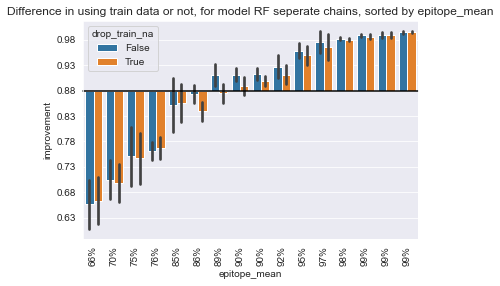

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

baseline = results['auc'].mean() # no baseline, just the mean of all scores

model = "RF seperate chains"

scores = results[results['model'] == model]
scores["improvement"] = scores["auc"] - baseline

for x in ['epitope_mean']:
    plot = sns.barplot(x=x, y="improvement", data=scores, ci="sd", hue="drop_train_na")
    # change label to percentages
    # check if x is float
    if x != 'positive_samples' and x != 'epitope':
        x_ticks = plot.get_xticklabels()
        plot.set_xticklabels([f"{float(x.get_text()):.0%}" for x in x_ticks])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(f'Difference in using train data or not, for model {model}, sorted by {x}')
    plot.axhline(0, color="k", clip_on=False)
    y_ticks = plot.get_yticks()
    plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])

    plt.show()
    plot.figure.clf()
    pass

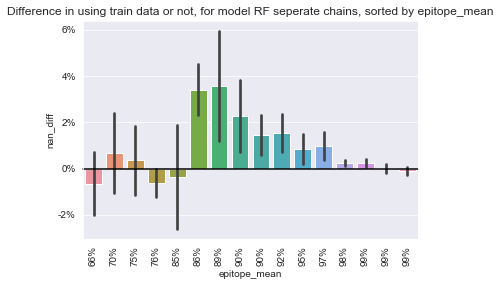

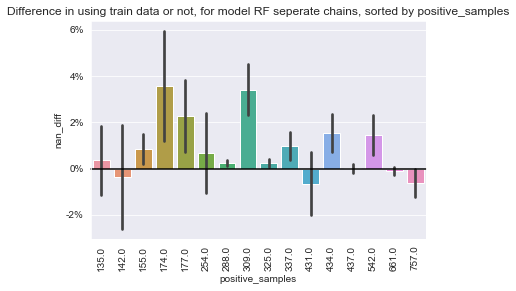

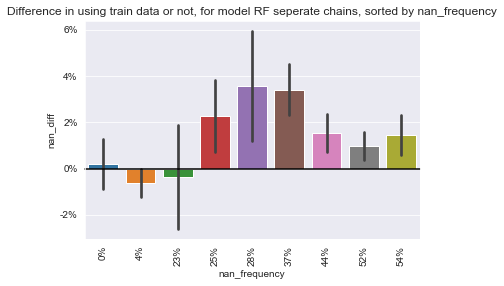

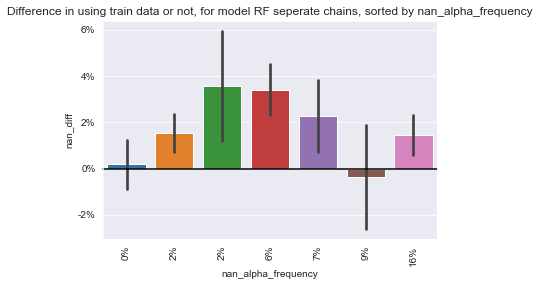

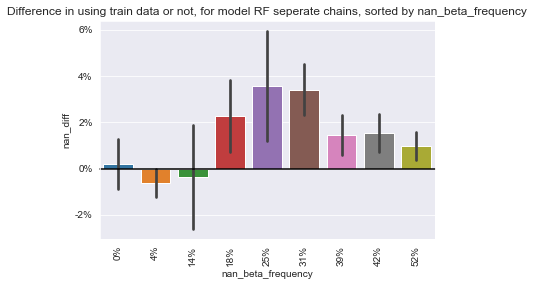

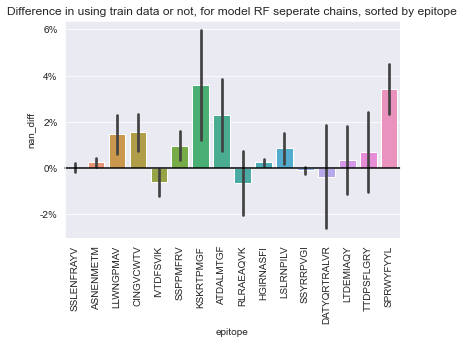

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

baseline = results['auc'].mean() # no baseline, just the mean of all scores

model = "RF seperate chains"

scores = results[results['model'] == model]
scores["improvement"] = scores["auc"] - baseline

for x in ['epitope_mean', 'positive_samples', 'nan_frequency', 'nan_alpha_frequency', 'nan_beta_frequency', 'epitope']:
    plot = sns.barplot(x=x, y="nan_diff", data=scores, ci="sd")
    # change label to percentages
    # check if x is float
    if x != 'positive_samples' and x != 'epitope':
        x_ticks = plot.get_xticklabels()
        plot.set_xticklabels([f"{float(x.get_text()):.0%}" for x in x_ticks])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(f'Difference in using train data or not, for model {model}, sorted by {x}')
    plot.axhline(0, color="k", clip_on=False)
    y_ticks = plot.get_yticks()
    plot.set_yticklabels([f"{y:.0%}" for y in y_ticks])

    plt.show()
    plot.figure.clf()
    pass

## Threshold 35
threshold verlagen naar 35 ofzo?
Instead of min. 100 samples, min. 35 samples
(mainly as hypothesis test for the epitope mean graph)
if results bad, not really an improvement, but impovement starts around 85% and the nan_diff decreases is the improvement goes towards 100%

In [1]:
import pandas as pd
from tqdm import tqdm
from util import get_counts, filter_df

df_vdjdb = pd.read_csv('data/vdjdb-2022-03-30/vdjdb_full.txt', sep='\t')
df_vdjdb.head()
rename_columns = {
    'antigen.epitope': 'epitope',
    'cdr3.alpha': 'CDR3_alfa',
    'v.alpha': 'TRAV',
    'j.alpha': 'TRAJ',
    'cdr3.beta': 'CDR3_beta',
    'v.beta': 'TRBV',
    'j.beta': 'TRBJ',
}

df_vdjdb = df_vdjdb.rename(columns=rename_columns)
df_vdjdb = df_vdjdb[rename_columns.values()]

C:\Users\arnod\AppData\Local\Temp/ipykernel_31260/3253834435.py:5: DtypeWarning: Columns (20,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vdjdb = pd.read_csv('data/vdjdb-2022-03-30/vdjdb_full.txt', sep='\t')


In [2]:
%%time
unique_epitopes = df_vdjdb['epitope'].unique()

scores = pd.DataFrame()
for epitope in tqdm(unique_epitopes, total=len(unique_epitopes)):
    positive_samples = df_vdjdb[df_vdjdb['epitope'] == epitope]
    alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos = get_counts(positive_samples)

    complete = both_count_pos
    incomplete = alpha_only_count_pos + beta_only_count_pos + non_count_pos

    total = complete + incomplete

    nan_frequency = incomplete / total

    nan_alpha_frequency = alpha_only_count_pos / total
    nan_beta_frequency = beta_only_count_pos / total

    index = len(scores)
    scores.loc[index, 'epitope'] = epitope
    scores.loc[index, 'nan_frequency'] = nan_frequency
    scores.loc[index, 'nan_alpha_frequency'] = nan_alpha_frequency
    scores.loc[index, 'nan_beta_frequency'] = nan_beta_frequency
    scores.loc[index, 'positive_samples'] = len(positive_samples)

print(f"Total: {len(scores)}")
print(f"Nan frequency < 0.8: {len(scores[scores['nan_frequency'] < 0.8])}")
print(f"Positive samples > 35: {len(scores[scores['positive_samples'] > 35])}")
print(
    f"Positive samples > 35 and positive samples < 1000: {len(scores[(scores['positive_samples'] > 35) & (scores['positive_samples'] < 1000)])}")

100%|██████████| 1150/1150 [00:07<00:00, 153.32it/s]

Total: 1150
Nan frequency < 0.8: 922
Positive samples > 35: 110
Positive samples > 35 and positive samples < 1000: 102
Wall time: 7.51 s


In [3]:
scores = scores[scores['nan_frequency'] < 0.8]
scores = scores[(scores['positive_samples'] > 35)]
scores = scores[(scores['positive_samples'] < 1000)]  # for efficiency
print(f"After: {len(scores)}")

After: 43


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

models_to_evaluate = []

models_to_evaluate.append({
    'name': 'RF seperate chains',
    'model_alpha': RandomForestClassifier(n_estimators=200),
    'model_beta': RandomForestClassifier(n_estimators=200),
    'imputer': SimpleImputer(strategy='mean'),
    'drop_train_na': False,
    'seperate_chains': True,
})

models_to_evaluate.append({
    'name': 'RF seperate chains',
    'model_alpha': RandomForestClassifier(n_estimators=200),
    'model_beta': RandomForestClassifier(n_estimators=200),
    'imputer': SimpleImputer(strategy='mean'),
    'drop_train_na': True,
    'seperate_chains': True,
})

In [5]:
%%time
from pandas.errors import DtypeWarning
from util import evaluate_cv_no_nan_test, get_scores_df_for_epitope
import pandas as pd

# ignore the dtype and fitted with header warnings
from warnings import simplefilter

simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DtypeWarning)

results = pd.DataFrame()

epitopes = scores['epitope'].unique()
# reverse the order
# epitopes = epitopes[::-1]
for epitope in tqdm(epitopes):
    try:
        epitope_score_df = get_scores_df_for_epitope(epitope, models_to_evaluate)
        # print(epitope_score_df)
        results = pd.concat([results, epitope_score_df])
    except Exception as e:
        print(f'Error evaluating epitope {epitope}: {e}')
        raise e

results

  0%|          | 0/43 [00:00<?, ?it/s]


Evaluating eptiope LLYDANYFL...
Number of negative samples changed from 60000 to 59980 (because of overlap with positive samples)
Epitope has 110 samples
AUC(m=RF seperate chains, s=0, train_na=1): 1.0
AUC(m=RF seperate chains, s=0, train_na=0): 1.0
AUC(m=RF seperate chains, s=1, train_na=1): 0.9821428571428571
AUC(m=RF seperate chains, s=1, train_na=0): 0.9285714285714286
AUC(m=RF seperate chains, s=2, train_na=1): 0.84375
AUC(m=RF seperate chains, s=2, train_na=0): 0.9375
Test set too small after dropping NaNs. Test set samples left: 9
Test set too small after dropping NaNs. Test set samples left: 9
AUC(m=RF seperate chains, s=4, train_na=1): 0.75


  2%|▏         | 1/43 [00:08<06:11,  8.85s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.6770833333333333

Evaluating eptiope ALSKGVHFV...
Number of negative samples changed from 60012 to 59999 (because of overlap with positive samples)
Epitope has 86 samples
Test set too small after dropping NaNs. Test set samples left: 8
Test set too small after dropping NaNs. Test set samples left: 8
Test set too small after dropping NaNs. Test set samples left: 8
Test set too small after dropping NaNs. Test set samples left: 8
AUC(m=RF seperate chains, s=2, train_na=1): 0.6666666666666667


  5%|▍         | 2/43 [00:10<03:10,  4.65s/it]

AUC(m=RF seperate chains, s=2, train_na=0): 0.6666666666666667
Test set too small after dropping NaNs. Test set samples left: 7
Test set too small after dropping NaNs. Test set samples left: 7
Test set too small after dropping NaNs. Test set samples left: 9
Test set too small after dropping NaNs. Test set samples left: 9

Evaluating eptiope ALWEIQQVV...
Number of negative samples changed from 60019 to 59985 (because of overlap with positive samples)
Epitope has 72 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.5
AUC(m=RF seperate chains, s=0, train_na=0): 0.41666666666666663
Test set too small after dropping NaNs. Test set samples left: 9
Test set too small after dropping NaNs. Test set samples left: 9
AUC(m=RF seperate chains, s=2, train_na=1): 0.3214285714285714
AUC(m=RF seperate chains, s=2, train_na=0): 0.30357142857142855
AUC(m=RF seperate chains, s=3, train_na=1): 0.4375
AUC(m=RF seperate chains, s=3, train_na=0): 0.46875
AUC(m=RF seperate chains, s=4, train_na=1): 0.64285

  7%|▋         | 3/43 [00:16<03:20,  5.01s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.5357142857142857

Evaluating eptiope LLFGYPVYV...
Number of negative samples changed from 60016 to 59831 (because of overlap with positive samples)
Epitope has 78 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.75
AUC(m=RF seperate chains, s=0, train_na=0): 0.828125
AUC(m=RF seperate chains, s=1, train_na=1): 0.53125
AUC(m=RF seperate chains, s=1, train_na=0): 0.609375
AUC(m=RF seperate chains, s=2, train_na=1): 0.6964285714285714
AUC(m=RF seperate chains, s=2, train_na=0): 0.6964285714285714
AUC(m=RF seperate chains, s=3, train_na=1): 0.625
AUC(m=RF seperate chains, s=3, train_na=0): 0.5555555555555556
AUC(m=RF seperate chains, s=4, train_na=1): 0.890625


  9%|▉         | 4/43 [00:23<03:52,  5.96s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.8125

Evaluating eptiope FLRGRAYGL...
Number of negative samples changed from 59973 to 59639 (because of overlap with positive samples)
Epitope has 164 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9166666666666667
AUC(m=RF seperate chains, s=0, train_na=0): 0.8666666666666667
AUC(m=RF seperate chains, s=1, train_na=1): 0.9761904761904763
AUC(m=RF seperate chains, s=1, train_na=0): 0.9642857142857143
AUC(m=RF seperate chains, s=2, train_na=1): 0.75
AUC(m=RF seperate chains, s=2, train_na=0): 0.525
AUC(m=RF seperate chains, s=3, train_na=1): 0.7999999999999999
AUC(m=RF seperate chains, s=3, train_na=0): 0.6666666666666667
AUC(m=RF seperate chains, s=4, train_na=1): 0.8809523809523809


 12%|█▏        | 5/43 [00:30<04:02,  6.39s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 1.0

Evaluating eptiope SSLENFRAYV...
Number of negative samples changed from 59618 to 59159 (because of overlap with positive samples)
Epitope has 874 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9974305555555556
AUC(m=RF seperate chains, s=0, train_na=0): 0.9973611111111111
AUC(m=RF seperate chains, s=1, train_na=1): 0.9804959598774032
AUC(m=RF seperate chains, s=1, train_na=0): 0.9806352744497074
AUC(m=RF seperate chains, s=2, train_na=1): 0.9870014972097455
AUC(m=RF seperate chains, s=2, train_na=0): 0.9856403974411324
AUC(m=RF seperate chains, s=3, train_na=1): 0.9918098818474758
AUC(m=RF seperate chains, s=3, train_na=0): 0.9921455424274973
AUC(m=RF seperate chains, s=4, train_na=1): 0.9925137362637363


 14%|█▍        | 6/43 [01:03<09:26, 15.30s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9923763736263735

Evaluating eptiope KLVALGINAV...
Number of negative samples changed from 59970 to 59944 (because of overlap with positive samples)
Epitope has 170 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.75
AUC(m=RF seperate chains, s=0, train_na=0): 0.7222222222222223
AUC(m=RF seperate chains, s=1, train_na=1): 0.9818181818181818
AUC(m=RF seperate chains, s=1, train_na=0): 0.8909090909090909
AUC(m=RF seperate chains, s=2, train_na=1): 0.9259259259259259
AUC(m=RF seperate chains, s=2, train_na=0): 0.8703703703703703
AUC(m=RF seperate chains, s=3, train_na=1): 0.9166666666666666
AUC(m=RF seperate chains, s=3, train_na=0): 0.9722222222222222
AUC(m=RF seperate chains, s=4, train_na=1): 1.0


 16%|█▋        | 7/43 [01:09<07:25, 12.37s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 1.0

Evaluating eptiope ASNENMETM...
Number of negative samples changed from 59730 to 59382 (because of overlap with positive samples)
Epitope has 650 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9822804314329737
AUC(m=RF seperate chains, s=0, train_na=0): 0.983692860811505
AUC(m=RF seperate chains, s=1, train_na=1): 0.9912525354969575
AUC(m=RF seperate chains, s=1, train_na=0): 0.9883367139959433
AUC(m=RF seperate chains, s=2, train_na=1): 0.9830395299145299
AUC(m=RF seperate chains, s=2, train_na=0): 0.9805021367521368
AUC(m=RF seperate chains, s=3, train_na=1): 0.9860429051434478
AUC(m=RF seperate chains, s=3, train_na=0): 0.9909537348151978
AUC(m=RF seperate chains, s=4, train_na=1): 0.9892011449388499


 19%|█▊        | 8/43 [01:31<09:00, 15.44s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9864689045016913

Evaluating eptiope IMDQVPFSV...


<timed exec>:20: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
 21%|██        | 9/43 [01:31<06:05, 10.76s/it]

Number of negative samples changed from 60010 to 60003 (because of overlap with positive samples)
Epitope has 90 samples
Test set too small after dropping NaNs. Test set samples left: 4
Test set too small after dropping NaNs. Test set samples left: 4
Test set too small after dropping NaNs. Test set samples left: 7
Test set too small after dropping NaNs. Test set samples left: 7
Test set too small after dropping NaNs. Test set samples left: 6
Test set too small after dropping NaNs. Test set samples left: 6
Test set too small after dropping NaNs. Test set samples left: 6
Test set too small after dropping NaNs. Test set samples left: 6
Test set too small after dropping NaNs. Test set samples left: 6
Test set too small after dropping NaNs. Test set samples left: 6

Evaluating eptiope RPPIFIRRL...
Number of negative samples changed from 59958 to 59949 (because of overlap with positive samples)
Epitope has 194 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8585858585858585
AUC(m=RF se

 23%|██▎       | 10/43 [01:38<05:15,  9.55s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.8958333333333333

Evaluating eptiope LLWNGPMAV...
Number of negative samples changed from 59513 to 59231 (because of overlap with positive samples)
Epitope has 1084 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8799999999999999
AUC(m=RF seperate chains, s=0, train_na=0): 0.8671111111111112
AUC(m=RF seperate chains, s=1, train_na=1): 0.9267222465993857
AUC(m=RF seperate chains, s=1, train_na=0): 0.8973233874506363
AUC(m=RF seperate chains, s=2, train_na=1): 0.890637610976594
AUC(m=RF seperate chains, s=2, train_na=0): 0.900726392251816
AUC(m=RF seperate chains, s=3, train_na=1): 0.8987373737373738
AUC(m=RF seperate chains, s=3, train_na=0): 0.905050505050505
AUC(m=RF seperate chains, s=4, train_na=1): 0.9078671328671328


 26%|██▌       | 11/43 [02:15<09:32, 17.90s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9020979020979021

Evaluating eptiope RPRGEVRFL...
Number of negative samples changed from 59976 to 59975 (because of overlap with positive samples)
Epitope has 158 samples
AUC(m=RF seperate chains, s=0, train_na=1): 1.0
AUC(m=RF seperate chains, s=0, train_na=0): 1.0
AUC(m=RF seperate chains, s=1, train_na=1): 1.0
AUC(m=RF seperate chains, s=1, train_na=0): 1.0
AUC(m=RF seperate chains, s=2, train_na=1): 0.8500000000000001
AUC(m=RF seperate chains, s=2, train_na=0): 0.9333333333333333
AUC(m=RF seperate chains, s=3, train_na=1): 1.0
AUC(m=RF seperate chains, s=3, train_na=0): 1.0
AUC(m=RF seperate chains, s=4, train_na=1): 0.9166666666666666


 28%|██▊       | 12/43 [02:22<07:26, 14.40s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9166666666666666

Evaluating eptiope CINGVCWTV...
Number of negative samples changed from 59621 to 59492 (because of overlap with positive samples)
Epitope has 868 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9392348087021756
AUC(m=RF seperate chains, s=0, train_na=0): 0.9289197299324831
AUC(m=RF seperate chains, s=1, train_na=1): 0.9302499999999999
AUC(m=RF seperate chains, s=1, train_na=0): 0.9070000000000001
AUC(m=RF seperate chains, s=2, train_na=1): 0.8875425170068028
AUC(m=RF seperate chains, s=2, train_na=0): 0.882015306122449
AUC(m=RF seperate chains, s=3, train_na=1): 0.9159999999999999
AUC(m=RF seperate chains, s=3, train_na=0): 0.8835999999999999
AUC(m=RF seperate chains, s=4, train_na=1): 0.951289949942241


 30%|███       | 13/43 [02:53<09:43, 19.44s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9358875625721987

Evaluating eptiope IVTDFSVIK...
Number of negative samples changed from 59298 to 55580 (because of overlap with positive samples)
Epitope has 1514 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.7458628841607564
AUC(m=RF seperate chains, s=0, train_na=0): 0.7585516476093983
AUC(m=RF seperate chains, s=1, train_na=1): 0.8014136904761906
AUC(m=RF seperate chains, s=1, train_na=0): 0.7939236111111111
AUC(m=RF seperate chains, s=2, train_na=1): 0.7427612655800574
AUC(m=RF seperate chains, s=2, train_na=0): 0.7376318312559923
AUC(m=RF seperate chains, s=3, train_na=1): 0.7794595110771582
AUC(m=RF seperate chains, s=3, train_na=0): 0.7790536669213141
AUC(m=RF seperate chains, s=4, train_na=1): 0.7464077018871539


 33%|███▎      | 14/43 [04:14<18:29, 38.27s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.7388638758501772

Evaluating eptiope CTELKLSDY...
Epitope has 84 samples
Test set too small after dropping NaNs. Test set samples left: 9
Test set too small after dropping NaNs. Test set samples left: 9
Test set too small after dropping NaNs. Test set samples left: 8
Test set too small after dropping NaNs. Test set samples left: 8
AUC(m=RF seperate chains, s=2, train_na=1): 0.7916666666666666


 35%|███▍      | 15/43 [04:16<12:40, 27.16s/it]

AUC(m=RF seperate chains, s=2, train_na=0): 1.0
Test set too small after dropping NaNs. Test set samples left: 6
Test set too small after dropping NaNs. Test set samples left: 6
Test set too small after dropping NaNs. Test set samples left: 6
Test set too small after dropping NaNs. Test set samples left: 6

Evaluating eptiope SSPPMFRV...
Number of negative samples changed from 59718 to 59626 (because of overlap with positive samples)
Epitope has 674 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9665032679738562
AUC(m=RF seperate chains, s=0, train_na=0): 0.9701797385620915
AUC(m=RF seperate chains, s=1, train_na=1): 0.9494949494949495
AUC(m=RF seperate chains, s=1, train_na=0): 0.9238215488215489
AUC(m=RF seperate chains, s=2, train_na=1): 0.999096657633243
AUC(m=RF seperate chains, s=2, train_na=0): 0.998193315266486
AUC(m=RF seperate chains, s=3, train_na=1): 0.9951219512195122
AUC(m=RF seperate chains, s=3, train_na=0): 0.9848780487804878
AUC(m=RF seperate chains, s=4, train

 37%|███▋      | 16/43 [04:36<11:19, 25.17s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9350358422939068

Evaluating eptiope KSKRTPMGF...
Number of negative samples changed from 59881 to 59842 (because of overlap with positive samples)
Epitope has 348 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8854166666666667
AUC(m=RF seperate chains, s=0, train_na=0): 0.8509615384615385
AUC(m=RF seperate chains, s=1, train_na=1): 0.9576719576719577
AUC(m=RF seperate chains, s=1, train_na=0): 0.8853615520282186
AUC(m=RF seperate chains, s=2, train_na=1): 0.9043478260869565
AUC(m=RF seperate chains, s=2, train_na=0): 0.8956521739130434
AUC(m=RF seperate chains, s=3, train_na=1): 0.8944281524926686
AUC(m=RF seperate chains, s=3, train_na=0): 0.8665689149560117
AUC(m=RF seperate chains, s=4, train_na=1): 0.9084821428571429


 40%|███▉      | 17/43 [04:47<09:03, 20.91s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.8504464285714286

Evaluating eptiope GPRLGVRAT...
Number of negative samples changed from 59980 to 59961 (because of overlap with positive samples)
Epitope has 150 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.7402597402597403
AUC(m=RF seperate chains, s=0, train_na=0): 0.7922077922077922
AUC(m=RF seperate chains, s=1, train_na=1): 0.9895833333333333
AUC(m=RF seperate chains, s=1, train_na=0): 0.9270833333333333
AUC(m=RF seperate chains, s=2, train_na=1): 0.8977272727272727
AUC(m=RF seperate chains, s=2, train_na=0): 0.8068181818181819
AUC(m=RF seperate chains, s=3, train_na=1): 0.8888888888888888
AUC(m=RF seperate chains, s=3, train_na=0): 0.8333333333333334
AUC(m=RF seperate chains, s=4, train_na=1): 0.7651515151515151


 42%|████▏     | 18/43 [04:54<06:54, 16.60s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.7234848484848485

Evaluating eptiope RAQAPPPSW...
Number of negative samples changed from 59983 to 59982 (because of overlap with positive samples)
Epitope has 144 samples
AUC(m=RF seperate chains, s=0, train_na=1): 1.0
AUC(m=RF seperate chains, s=0, train_na=0): 1.0
AUC(m=RF seperate chains, s=1, train_na=1): 0.9940828402366865
AUC(m=RF seperate chains, s=1, train_na=0): 0.9792899408284024
AUC(m=RF seperate chains, s=2, train_na=1): 1.0
AUC(m=RF seperate chains, s=2, train_na=0): 0.9947916666666666
AUC(m=RF seperate chains, s=3, train_na=1): 1.0
AUC(m=RF seperate chains, s=3, train_na=0): 1.0
AUC(m=RF seperate chains, s=4, train_na=1): 0.9281045751633986


 44%|████▍     | 19/43 [05:00<05:25, 13.56s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9477124183006537

Evaluating eptiope HPVTKYIM...
Number of negative samples changed from 59981 to 59961 (because of overlap with positive samples)
Epitope has 148 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.7320261437908497
AUC(m=RF seperate chains, s=0, train_na=0): 0.7712418300653594
AUC(m=RF seperate chains, s=1, train_na=1): 0.8142857142857143
AUC(m=RF seperate chains, s=1, train_na=0): 0.8
AUC(m=RF seperate chains, s=2, train_na=1): 0.7792207792207791
AUC(m=RF seperate chains, s=2, train_na=0): 0.7987012987012987
AUC(m=RF seperate chains, s=3, train_na=1): 0.75390625
AUC(m=RF seperate chains, s=3, train_na=0): 0.7578125
AUC(m=RF seperate chains, s=4, train_na=1): 0.8802083333333334


 47%|████▋     | 20/43 [05:07<04:25, 11.54s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.8072916666666666

Evaluating eptiope ATDALMTGF...
Number of negative samples changed from 59878 to 59840 (because of overlap with positive samples)
Epitope has 354 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8886956521739131
AUC(m=RF seperate chains, s=0, train_na=0): 0.8521739130434782
AUC(m=RF seperate chains, s=1, train_na=1): 0.8894736842105263
AUC(m=RF seperate chains, s=1, train_na=0): 0.887719298245614
AUC(m=RF seperate chains, s=2, train_na=1): 0.9105113636363638
AUC(m=RF seperate chains, s=2, train_na=0): 0.8735795454545454
AUC(m=RF seperate chains, s=3, train_na=1): 0.9347158218125959
AUC(m=RF seperate chains, s=3, train_na=0): 0.9093701996927803
AUC(m=RF seperate chains, s=4, train_na=1): 0.9347826086956521


 49%|████▉     | 21/43 [05:18<04:09, 11.34s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9150197628458497

Evaluating eptiope SLFNTVATLY...
Number of negative samples changed from 60017 to 59354 (because of overlap with positive samples)
Epitope has 76 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.62
AUC(m=RF seperate chains, s=0, train_na=0): 0.75
AUC(m=RF seperate chains, s=1, train_na=1): 0.3
AUC(m=RF seperate chains, s=1, train_na=0): 0.34
AUC(m=RF seperate chains, s=2, train_na=1): 0.3203125
AUC(m=RF seperate chains, s=2, train_na=0): 0.2421875
AUC(m=RF seperate chains, s=3, train_na=1): 0.5714285714285714
AUC(m=RF seperate chains, s=3, train_na=0): 0.5714285714285714
AUC(m=RF seperate chains, s=4, train_na=1): 0.5


 51%|█████     | 22/43 [05:24<03:22,  9.63s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.3636363636363636

Evaluating eptiope RLRAEAQVK...
Number of negative samples changed from 59624 to 57246 (because of overlap with positive samples)
Epitope has 862 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.6347612359550562
AUC(m=RF seperate chains, s=0, train_na=0): 0.6301966292134832
AUC(m=RF seperate chains, s=1, train_na=1): 0.5738884045335658
AUC(m=RF seperate chains, s=1, train_na=0): 0.5719267654751525
AUC(m=RF seperate chains, s=2, train_na=1): 0.667675021607606
AUC(m=RF seperate chains, s=2, train_na=0): 0.6457793143186402
AUC(m=RF seperate chains, s=3, train_na=1): 0.7083628632175762
AUC(m=RF seperate chains, s=3, train_na=0): 0.7035435861091425
AUC(m=RF seperate chains, s=4, train_na=1): 0.7134831460674158


 53%|█████▎    | 23/43 [06:03<06:10, 18.50s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.6856013316687474

Evaluating eptiope AYAQKIFKI...
Number of negative samples changed from 60016 to 59727 (because of overlap with positive samples)
Epitope has 78 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.59375
AUC(m=RF seperate chains, s=0, train_na=0): 0.578125
AUC(m=RF seperate chains, s=1, train_na=1): 0.5546875
AUC(m=RF seperate chains, s=1, train_na=0): 0.546875
AUC(m=RF seperate chains, s=2, train_na=1): 0.36507936507936506
AUC(m=RF seperate chains, s=2, train_na=0): 0.3968253968253968
AUC(m=RF seperate chains, s=3, train_na=1): 0.28205128205128205
AUC(m=RF seperate chains, s=3, train_na=0): 0.2179487179487179
AUC(m=RF seperate chains, s=4, train_na=1): 0.47321428571428575


 56%|█████▌    | 24/43 [06:09<04:39, 14.70s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.4285714285714286

Evaluating eptiope FLYALALLL...
Number of negative samples changed from 60017 to 59869 (because of overlap with positive samples)
Epitope has 76 samples
AUC(m=RF seperate chains, s=0, train_na=1): 1.0
AUC(m=RF seperate chains, s=0, train_na=0): 1.0
AUC(m=RF seperate chains, s=1, train_na=1): 0.9818181818181819
AUC(m=RF seperate chains, s=1, train_na=0): 0.9818181818181819
AUC(m=RF seperate chains, s=2, train_na=1): 0.984375
AUC(m=RF seperate chains, s=2, train_na=0): 0.96875
AUC(m=RF seperate chains, s=3, train_na=1): 0.890625
AUC(m=RF seperate chains, s=3, train_na=0): 0.875
AUC(m=RF seperate chains, s=4, train_na=1): 1.0


 58%|█████▊    | 25/43 [06:14<03:34, 11.94s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 1.0

Evaluating eptiope RTLNAWVKV...
Number of negative samples changed from 60008 to 59512 (because of overlap with positive samples)
Epitope has 94 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.7662337662337662
AUC(m=RF seperate chains, s=0, train_na=0): 0.7792207792207791
AUC(m=RF seperate chains, s=1, train_na=1): 0.7840909090909091
AUC(m=RF seperate chains, s=1, train_na=0): 0.7556818181818181
AUC(m=RF seperate chains, s=2, train_na=1): 0.869047619047619
AUC(m=RF seperate chains, s=2, train_na=0): 0.8809523809523809
AUC(m=RF seperate chains, s=3, train_na=1): 0.6555555555555556
AUC(m=RF seperate chains, s=3, train_na=0): 0.6555555555555556
AUC(m=RF seperate chains, s=4, train_na=1): 0.8806818181818181


 60%|██████    | 26/43 [06:20<02:53, 10.19s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.8409090909090909

Evaluating eptiope QYDPVAALF...


<timed exec>:20: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
 63%|██████▎   | 27/43 [06:21<01:56,  7.28s/it]

Number of negative samples changed from 60016 to 59672 (because of overlap with positive samples)
Epitope has 78 samples
Test set too small after dropping NaNs. Test set samples left: 4
Test set too small after dropping NaNs. Test set samples left: 4
Test set too small after dropping NaNs. Test set samples left: 3
Test set too small after dropping NaNs. Test set samples left: 3
Test set too small after dropping NaNs. Test set samples left: 5
Test set too small after dropping NaNs. Test set samples left: 5
Test set too small after dropping NaNs. Test set samples left: 7
Test set too small after dropping NaNs. Test set samples left: 7
Test set too small after dropping NaNs. Test set samples left: 8
Test set too small after dropping NaNs. Test set samples left: 8

Evaluating eptiope RPHERNGFTVL...
Number of negative samples changed from 59976 to 59964 (because of overlap with positive samples)
Epitope has 158 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8222222222222222
AUC(m=RF 

 65%|██████▌   | 28/43 [06:25<01:34,  6.28s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.638888888888889

Evaluating eptiope HGIRNASFI...
Number of negative samples changed from 59767 to 59561 (because of overlap with positive samples)
Epitope has 576 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9811616954474098
AUC(m=RF seperate chains, s=0, train_na=0): 0.9836734693877551
AUC(m=RF seperate chains, s=1, train_na=1): 0.9794258373205742
AUC(m=RF seperate chains, s=1, train_na=0): 0.9733652312599681
AUC(m=RF seperate chains, s=2, train_na=1): 0.983363581367211
AUC(m=RF seperate chains, s=2, train_na=0): 0.985632183908046
AUC(m=RF seperate chains, s=3, train_na=1): 0.982523971543458
AUC(m=RF seperate chains, s=3, train_na=0): 0.9857717290442314
AUC(m=RF seperate chains, s=4, train_na=1): 0.9856209150326797


 67%|██████▋   | 29/43 [06:44<02:23, 10.27s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9803921568627451

Evaluating eptiope TVYGFCLL...
Number of negative samples changed from 59966 to 59867 (because of overlap with positive samples)
Epitope has 178 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8860294117647058
AUC(m=RF seperate chains, s=0, train_na=0): 0.8713235294117647
AUC(m=RF seperate chains, s=1, train_na=1): 0.9659090909090909
AUC(m=RF seperate chains, s=1, train_na=0): 0.9659090909090908
AUC(m=RF seperate chains, s=2, train_na=1): 0.9473684210526315
AUC(m=RF seperate chains, s=2, train_na=0): 0.9368421052631579
AUC(m=RF seperate chains, s=3, train_na=1): 0.887719298245614
AUC(m=RF seperate chains, s=3, train_na=0): 0.887719298245614
AUC(m=RF seperate chains, s=4, train_na=1): 0.9375


 70%|██████▉   | 30/43 [06:52<02:02,  9.46s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9253472222222222

Evaluating eptiope LSLRNPILV...
Number of negative samples changed from 59900 to 59848 (because of overlap with positive samples)
Epitope has 310 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9477011494252874
AUC(m=RF seperate chains, s=0, train_na=0): 0.957471264367816
AUC(m=RF seperate chains, s=1, train_na=1): 0.9688940092165899
AUC(m=RF seperate chains, s=1, train_na=0): 0.9758064516129032
AUC(m=RF seperate chains, s=2, train_na=1): 0.9095238095238095
AUC(m=RF seperate chains, s=2, train_na=0): 0.9226190476190477
AUC(m=RF seperate chains, s=3, train_na=1): 0.9533333333333334
AUC(m=RF seperate chains, s=3, train_na=0): 0.9566666666666667
AUC(m=RF seperate chains, s=4, train_na=1): 0.962962962962963


 72%|███████▏  | 31/43 [07:03<01:58,  9.85s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9504181600955796

Evaluating eptiope SSYRRPVGI...
Number of negative samples changed from 59394 to 59159 (because of overlap with positive samples)
Epitope has 1322 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.99357841404501
AUC(m=RF seperate chains, s=0, train_na=0): 0.993872982208083
AUC(m=RF seperate chains, s=1, train_na=1): 0.994125715648855
AUC(m=RF seperate chains, s=1, train_na=0): 0.9926347805343512
AUC(m=RF seperate chains, s=2, train_na=1): 0.9932173913043478
AUC(m=RF seperate chains, s=2, train_na=0): 0.9923188405797102
AUC(m=RF seperate chains, s=3, train_na=1): 0.9975390673065092
AUC(m=RF seperate chains, s=3, train_na=0): 0.9972006890611542
AUC(m=RF seperate chains, s=4, train_na=1): 0.9947352310988674


 74%|███████▍  | 32/43 [07:56<04:11, 22.84s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9952249770431588

Evaluating eptiope DATYQRTRALVR...
Number of negative samples changed from 59913 to 59846 (because of overlap with positive samples)
Epitope has 284 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8976608187134503
AUC(m=RF seperate chains, s=0, train_na=0): 0.902046783625731
AUC(m=RF seperate chains, s=1, train_na=1): 0.7673913043478261
AUC(m=RF seperate chains, s=1, train_na=0): 0.7608695652173914
AUC(m=RF seperate chains, s=2, train_na=1): 0.9139130434782609
AUC(m=RF seperate chains, s=2, train_na=0): 0.9008695652173913
AUC(m=RF seperate chains, s=3, train_na=1): 0.8752941176470588
AUC(m=RF seperate chains, s=3, train_na=0): 0.8776470588235293
AUC(m=RF seperate chains, s=4, train_na=1): 0.8009259259259259


 77%|███████▋  | 33/43 [08:05<03:07, 18.80s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.8368055555555556

Evaluating eptiope LTDEMIAQY...
Number of negative samples changed from 59920 to 59866 (because of overlap with positive samples)
Epitope has 270 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.7523148148148149
AUC(m=RF seperate chains, s=0, train_na=0): 0.7391975308641976
AUC(m=RF seperate chains, s=1, train_na=1): 0.645
AUC(m=RF seperate chains, s=1, train_na=0): 0.65
AUC(m=RF seperate chains, s=2, train_na=1): 0.7367149758454107
AUC(m=RF seperate chains, s=2, train_na=0): 0.7294685990338164
AUC(m=RF seperate chains, s=3, train_na=1): 0.8346153846153845
AUC(m=RF seperate chains, s=3, train_na=0): 0.823076923076923
AUC(m=RF seperate chains, s=4, train_na=1): 0.7681818181818182


 79%|███████▉  | 34/43 [08:15<02:25, 16.19s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.7651515151515151

Evaluating eptiope TTDPSFLGRY...
Number of negative samples changed from 59801 to 59615 (because of overlap with positive samples)
Epitope has 508 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.6933962264150944
AUC(m=RF seperate chains, s=0, train_na=0): 0.7134946677604593
AUC(m=RF seperate chains, s=1, train_na=1): 0.7126530612244897
AUC(m=RF seperate chains, s=1, train_na=0): 0.7157142857142856
AUC(m=RF seperate chains, s=2, train_na=1): 0.7086192109777016
AUC(m=RF seperate chains, s=2, train_na=0): 0.6931818181818181
AUC(m=RF seperate chains, s=3, train_na=1): 0.7176418439716312
AUC(m=RF seperate chains, s=3, train_na=0): 0.7324911347517731
AUC(m=RF seperate chains, s=4, train_na=1): 0.6468545751633986


 81%|████████▏ | 35/43 [08:34<02:15, 16.98s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.6284722222222222

Evaluating eptiope QYIKWPWYI...
Number of negative samples changed from 60008 to 60003 (because of overlap with positive samples)
Epitope has 94 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.44999999999999996
AUC(m=RF seperate chains, s=0, train_na=0): 0.41666666666666663
AUC(m=RF seperate chains, s=1, train_na=1): 0.611111111111111
AUC(m=RF seperate chains, s=1, train_na=0): 0.5740740740740741
AUC(m=RF seperate chains, s=2, train_na=1): 0.6666666666666667
AUC(m=RF seperate chains, s=2, train_na=0): 0.6587301587301588
AUC(m=RF seperate chains, s=3, train_na=1): 0.7936507936507937
AUC(m=RF seperate chains, s=3, train_na=0): 0.7777777777777778
AUC(m=RF seperate chains, s=4, train_na=1): 0.5681818181818181


 84%|████████▎ | 36/43 [08:40<01:35, 13.65s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.6818181818181819

Evaluating eptiope PTDNYITTY...
Number of negative samples changed from 60014 to 60013 (because of overlap with positive samples)
Epitope has 82 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.7037037037037037
AUC(m=RF seperate chains, s=0, train_na=0): 0.7962962962962963
AUC(m=RF seperate chains, s=1, train_na=1): 0.85
AUC(m=RF seperate chains, s=1, train_na=0): 0.85
AUC(m=RF seperate chains, s=2, train_na=1): 0.7111111111111111
AUC(m=RF seperate chains, s=2, train_na=0): 0.8666666666666667
AUC(m=RF seperate chains, s=3, train_na=1): 0.75
AUC(m=RF seperate chains, s=3, train_na=0): 0.8194444444444444
AUC(m=RF seperate chains, s=4, train_na=1): 0.9365079365079365


 86%|████████▌ | 37/43 [08:46<01:07, 11.27s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.8888888888888888

Evaluating eptiope NYNYLYRLF...
Number of negative samples changed from 59984 to 59979 (because of overlap with positive samples)
Epitope has 142 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.9909090909090909
AUC(m=RF seperate chains, s=0, train_na=0): 0.9909090909090909
AUC(m=RF seperate chains, s=1, train_na=1): 0.9923076923076923
AUC(m=RF seperate chains, s=1, train_na=0): 0.9769230769230769
AUC(m=RF seperate chains, s=2, train_na=1): 0.990909090909091
AUC(m=RF seperate chains, s=2, train_na=0): 0.9818181818181818
AUC(m=RF seperate chains, s=3, train_na=1): 0.9487179487179487
AUC(m=RF seperate chains, s=3, train_na=0): 0.9679487179487178
AUC(m=RF seperate chains, s=4, train_na=1): 0.9797979797979797


 88%|████████▊ | 38/43 [08:52<00:48,  9.78s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9898989898989898

Evaluating eptiope NQKLIANQF...
Number of negative samples changed from 59978 to 59917 (because of overlap with positive samples)
Epitope has 154 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.6473214285714286
AUC(m=RF seperate chains, s=0, train_na=0): 0.6316964285714286
AUC(m=RF seperate chains, s=1, train_na=1): 0.6742081447963801
AUC(m=RF seperate chains, s=1, train_na=0): 0.6900452488687783
AUC(m=RF seperate chains, s=2, train_na=1): 0.6458333333333334
AUC(m=RF seperate chains, s=2, train_na=0): 0.5763888888888888
AUC(m=RF seperate chains, s=3, train_na=1): 0.4182692307692308
AUC(m=RF seperate chains, s=3, train_na=0): 0.43028846153846156
AUC(m=RF seperate chains, s=4, train_na=1): 0.8088235294117647


 91%|█████████ | 39/43 [08:59<00:36,  9.04s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.7941176470588236

Evaluating eptiope FTSDYYQLY...
Number of negative samples changed from 60012 to 59990 (because of overlap with positive samples)
Epitope has 86 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.7037037037037037
AUC(m=RF seperate chains, s=0, train_na=0): 0.6851851851851852
AUC(m=RF seperate chains, s=1, train_na=1): 0.7654320987654322
AUC(m=RF seperate chains, s=1, train_na=0): 0.7901234567901235
AUC(m=RF seperate chains, s=2, train_na=1): 0.6666666666666666
AUC(m=RF seperate chains, s=2, train_na=0): 0.7083333333333334
AUC(m=RF seperate chains, s=3, train_na=1): 0.6964285714285714
AUC(m=RF seperate chains, s=3, train_na=0): 0.6785714285714285
AUC(m=RF seperate chains, s=4, train_na=1): 0.6071428571428571


 93%|█████████▎| 40/43 [09:05<00:24,  8.06s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.7857142857142857

Evaluating eptiope SPRWYFYYL...
Number of negative samples changed from 59746 to 59690 (because of overlap with positive samples)
Epitope has 618 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8854166666666667
AUC(m=RF seperate chains, s=0, train_na=0): 0.8754340277777778
AUC(m=RF seperate chains, s=1, train_na=1): 0.8386243386243386
AUC(m=RF seperate chains, s=1, train_na=0): 0.8240740740740741
AUC(m=RF seperate chains, s=2, train_na=1): 0.8972953216374269
AUC(m=RF seperate chains, s=2, train_na=0): 0.8333333333333334
AUC(m=RF seperate chains, s=3, train_na=1): 0.8521367521367521
AUC(m=RF seperate chains, s=3, train_na=0): 0.8282051282051283
AUC(m=RF seperate chains, s=4, train_na=1): 0.878125


 95%|█████████▌| 41/43 [09:25<00:22, 11.49s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.846875

Evaluating eptiope RLPGVLPRA...
Number of negative samples changed from 60007 to 59973 (because of overlap with positive samples)
Epitope has 96 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.5
AUC(m=RF seperate chains, s=0, train_na=0): 0.55
AUC(m=RF seperate chains, s=1, train_na=1): 0.7428571428571429
AUC(m=RF seperate chains, s=1, train_na=0): 0.49285714285714277
AUC(m=RF seperate chains, s=2, train_na=1): 0.3492063492063492
AUC(m=RF seperate chains, s=2, train_na=0): 0.32539682539682546
AUC(m=RF seperate chains, s=3, train_na=1): 0.308641975308642
AUC(m=RF seperate chains, s=3, train_na=0): 0.46296296296296297
AUC(m=RF seperate chains, s=4, train_na=1): 0.2777777777777778


 98%|█████████▊| 42/43 [09:31<00:09,  9.81s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.3402777777777778

Evaluating eptiope KAVYNFATC...
Number of negative samples changed from 59981 to 59909 (because of overlap with positive samples)
Epitope has 148 samples
AUC(m=RF seperate chains, s=0, train_na=1): 0.8285714285714285
AUC(m=RF seperate chains, s=0, train_na=0): 0.8571428571428572
AUC(m=RF seperate chains, s=1, train_na=1): 0.8716577540106952
AUC(m=RF seperate chains, s=1, train_na=0): 0.9064171122994652
AUC(m=RF seperate chains, s=2, train_na=1): 0.7884615384615384
AUC(m=RF seperate chains, s=2, train_na=0): 0.8205128205128205
AUC(m=RF seperate chains, s=3, train_na=1): 0.6984126984126984
AUC(m=RF seperate chains, s=3, train_na=0): 0.6547619047619048
AUC(m=RF seperate chains, s=4, train_na=1): 0.9615384615384616


100%|██████████| 43/43 [09:37<00:00, 13.44s/it]

AUC(m=RF seperate chains, s=4, train_na=0): 0.9587912087912087
Wall time: 9min 37s


,model,auc,drop_train_na,epitope
0,RF seperate chains,1.000000,False,LLYDANYFL
1,RF seperate chains,1.000000,True,LLYDANYFL
2,RF seperate chains,0.982143,False,LLYDANYFL
3,RF seperate chains,0.928571,True,LLYDANYFL
4,RF seperate chains,0.843750,False,LLYDANYFL
...,...,...,...,...
5,RF seperate chains,0.820513,True,KAVYNFATC
6,RF seperate chains,0.698413,False,KAVYNFATC
7,RF seperate chains,0.654762,True,KAVYNFATC
8,RF seperate chains,0.961538,False,KAVYNFATC


In [6]:
unique_epitopes = results['epitope'].unique()

for epitope in tqdm(unique_epitopes, total=len(unique_epitopes)):
    positive_samples = df_vdjdb[df_vdjdb['epitope'] == epitope]
    alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos = get_counts(positive_samples)

    complete = both_count_pos
    incomplete = alpha_only_count_pos + beta_only_count_pos + non_count_pos

    total = complete + incomplete

    nan_frequency = incomplete / total

    nan_alpha_frequency = alpha_only_count_pos / total
    nan_beta_frequency = beta_only_count_pos / total

    # assign it everywhere in results for this epitope
    results.loc[results['epitope'] == epitope, 'nan_frequency'] = nan_frequency
    results.loc[results['epitope'] == epitope, 'nan_alpha_frequency'] = nan_alpha_frequency
    results.loc[results['epitope'] == epitope, 'nan_beta_frequency'] = nan_beta_frequency
    results.loc[results['epitope'] == epitope, 'positive_samples'] = len(positive_samples)

results.to_csv('outputs/epitope_trend_rf_sep_tresh35.csv', index=False)

100%|██████████| 41/41 [00:00<00:00, 193.38it/s]


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

baseline = results['auc'].mean()  # no baseline, just the mean of all scores

model = "RF seperate chains"

scores = results[results['model'] == model]
scores["improvement"] = scores["auc"] - baseline

In [8]:
unique_epitopes = results['epitope'].unique()

for epitope in tqdm(unique_epitopes, total=len(unique_epitopes)):
    results_mean_epitope = results[results['epitope'] == epitope]['auc'].mean()
    # results_mean_epitope_drop_na = results[(results['epitope'] == epitope) & (results['drop_train_na'] == True)]['auc'].mean()
    # results_mean_epitope_no_drop_na = results[(results['epitope'] == epitope) & (results['drop_train_na'] == False)]['auc'].mean()

    # assign it everywhere in results for this epitope
    results.loc[results['epitope'] == epitope, 'epitope_mean'] = results_mean_epitope
    # results.loc[results['epitope'] == epitope, 'epitope_mean_drop_na'] = results_mean_epitope_drop_na
    # results.loc[results['epitope'] == epitope, 'epitope_mean_no_drop_na'] = results_mean_epitope_no_drop_na

100%|██████████| 41/41 [00:00<00:00, 1519.66it/s]


In [9]:
# iterate over the rows in results, if row number odd, set nan_diff  to the difference between the auc of the row and the auc of the next row
# if row number even, set nan_diff to the difference between the auc of the row and the auc of the previous row

results_drop_na = results[results['drop_train_na'] == True]['auc'].reset_index(drop=True)
results_no_drop_na = results[results['drop_train_na'] == False]['auc'].reset_index(drop=True)

assert len(results_drop_na) == len(results_no_drop_na)

results_diff = results_no_drop_na - results_drop_na

# convert results diff [a, b, c] to [a, a, b, b, c, c]
results_diff = results_diff.repeat(2).reset_index(drop=True)

results = results.reset_index(drop=True)

# add the results_diff to the results dataframe
results['nan_diff'] = results_diff

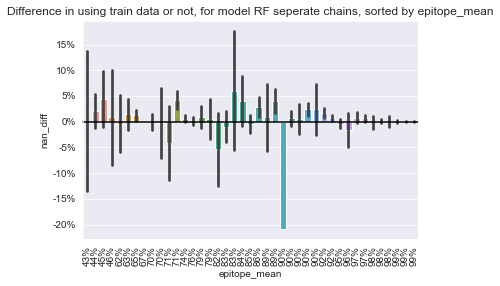

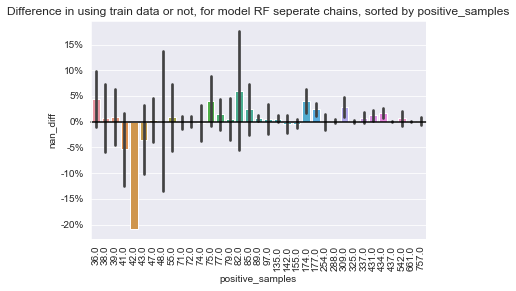

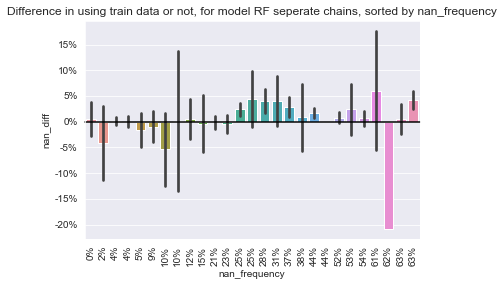

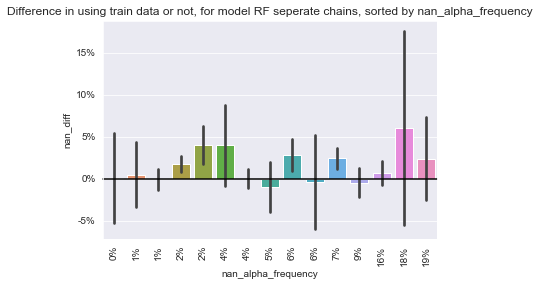

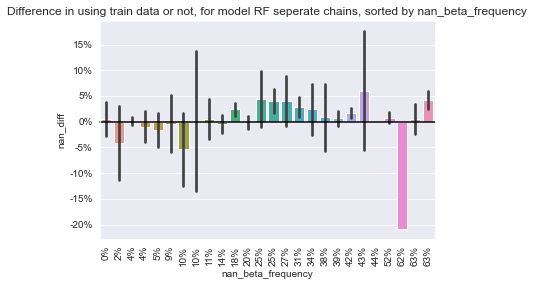

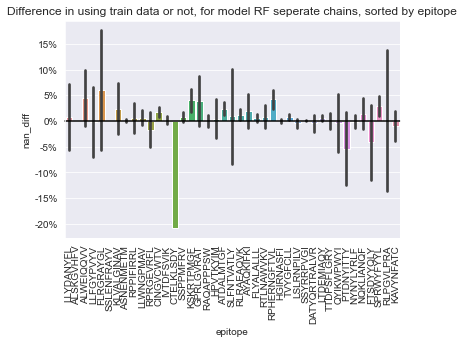

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

baseline = results['auc'].mean()  # no baseline, just the mean of all scores

model = "RF seperate chains"

scores = results[results['model'] == model]
scores["improvement"] = scores["auc"] - baseline

for x in ['epitope_mean', 'positive_samples', 'nan_frequency', 'nan_alpha_frequency', 'nan_beta_frequency', 'epitope']:
    plot = sns.barplot(x=x, y="nan_diff", data=scores, ci="sd")
    # change label to percentages
    # check if x is float
    if x != 'positive_samples' and x != 'epitope':
        x_ticks = plot.get_xticklabels()
        plot.set_xticklabels([f"{float(x.get_text()):.0%}" for x in x_ticks])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(f'Difference in using train data or not, for model {model}, sorted by {x}')
    plot.axhline(0, color="k", clip_on=False)
    y_ticks = plot.get_yticks()
    plot.set_yticklabels([f"{y:.0%}" for y in y_ticks])

    plt.show()
    plot.figure.clf()
    pass

In [11]:
scores = scores[scores['nan_frequency'] == 0]

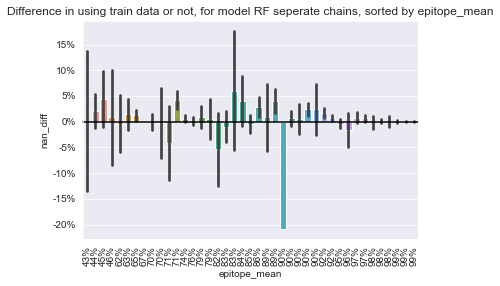

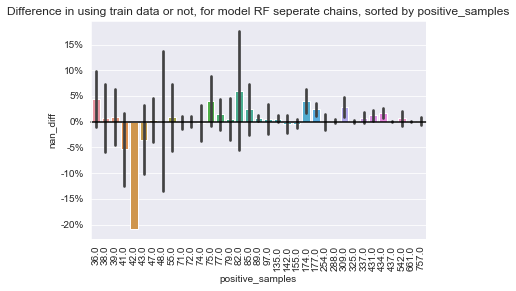

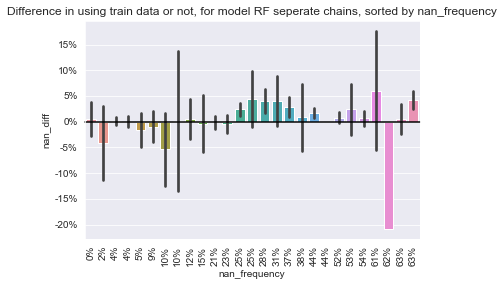

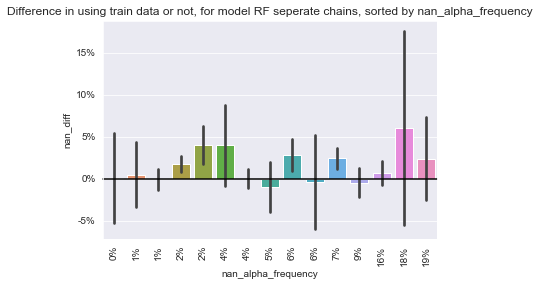

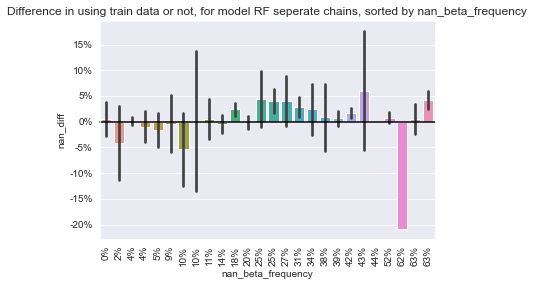

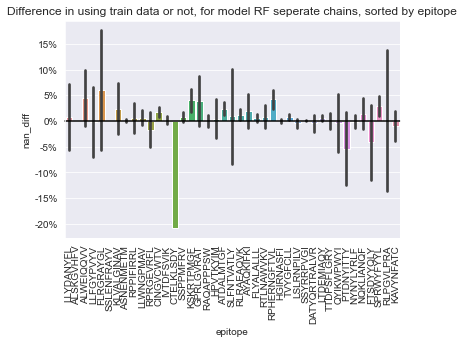

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

baseline = results['auc'].mean()  # no baseline, just the mean of all scores

model = "RF seperate chains"

scores = results[results['model'] == model]
scores["improvement"] = scores["auc"] - baseline

for x in ['epitope_mean', 'positive_samples', 'nan_frequency', 'nan_alpha_frequency', 'nan_beta_frequency', 'epitope']:
    plot = sns.barplot(x=x, y="nan_diff", data=scores, ci="sd")
    # change label to percentages
    # check if x is float
    if x != 'positive_samples' and x != 'epitope':
        x_ticks = plot.get_xticklabels()
        plot.set_xticklabels([f"{float(x.get_text()):.0%}" for x in x_ticks])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(f'Difference in using train data or not, for model {model}, sorted by {x}')
    plot.axhline(0, color="k", clip_on=False)
    y_ticks = plot.get_yticks()
    plot.set_yticklabels([f"{y:.0%}" for y in y_ticks])

    plt.show()
    plot.figure.clf()
    pass

In [21]:
scores_b = scores[scores['positive_samples'] > 100]
# nan frequency > 0.05
scores_b = scores_b[scores_b['nan_frequency'] > 0.05]

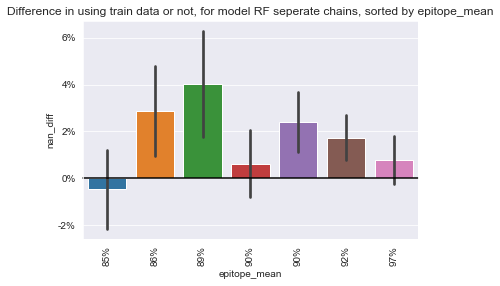

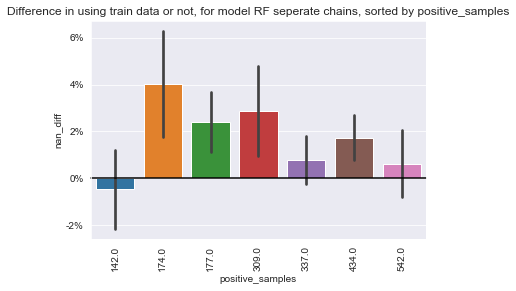

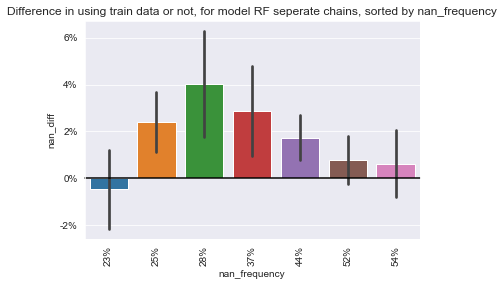

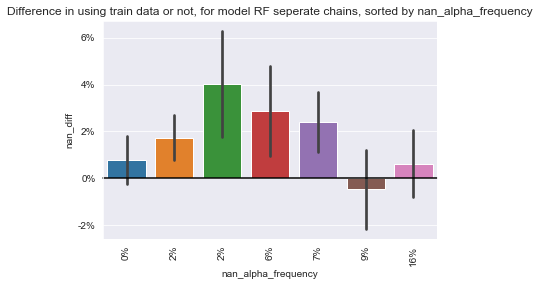

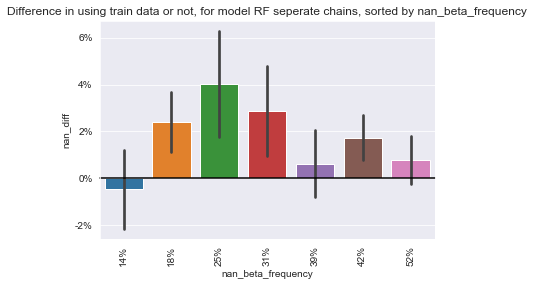

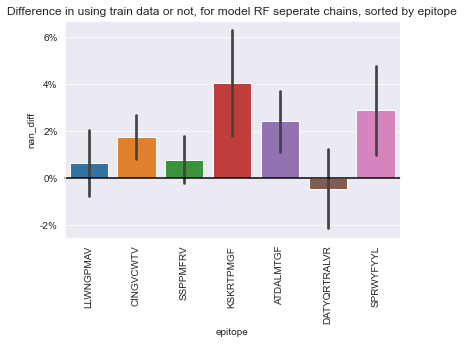

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

baseline = results['auc'].mean()  # no baseline, just the mean of all scores

model = "RF seperate chains"

scores_b = scores_b[scores_b['model'] == model]
scores_b["improvement"] = scores_b["auc"] - baseline

for x in ['epitope_mean', 'positive_samples', 'nan_frequency', 'nan_alpha_frequency', 'nan_beta_frequency', 'epitope']:
    plot = sns.barplot(x=x, y="nan_diff", data=scores_b, ci="sd")
    # change label to percentages
    # check if x is float
    if x != 'positive_samples' and x != 'epitope':
        x_ticks = plot.get_xticklabels()
        plot.set_xticklabels([f"{float(x.get_text()):.0%}" for x in x_ticks])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.set_title(f'Difference in using train data or not, for model {model}, sorted by {x}')
    plot.axhline(0, color="k", clip_on=False)
    y_ticks = plot.get_yticks()
    plot.set_yticklabels([f"{y:.0%}" for y in y_ticks])

    plt.show()
    plot.figure.clf()
    pass

In [20]:
scores_b

,model,auc,drop_train_na,epitope,nan_frequency,nan_alpha_frequency,nan_beta_frequency,positive_samples,epitope_mean,nan_diff,improvement
0,RF seperate chains,1.000000,False,LLYDANYFL,0.381818,0.000000,0.381818,55.0,0.889881,0.000000,0.187360
1,RF seperate chains,1.000000,True,LLYDANYFL,0.381818,0.000000,0.381818,55.0,0.889881,0.000000,0.187360
2,RF seperate chains,0.982143,False,LLYDANYFL,0.381818,0.000000,0.381818,55.0,0.889881,0.053571,0.169503
3,RF seperate chains,0.928571,True,LLYDANYFL,0.381818,0.000000,0.381818,55.0,0.889881,0.053571,0.115931
4,RF seperate chains,0.843750,False,LLYDANYFL,0.381818,0.000000,0.381818,55.0,0.889881,-0.093750,0.031110
...,...,...,...,...,...,...,...,...,...,...,...
381,RF seperate chains,0.820513,True,KAVYNFATC,0.094595,0.054054,0.040541,74.0,0.834627,-0.032051,0.007873
382,RF seperate chains,0.698413,False,KAVYNFATC,0.094595,0.054054,0.040541,74.0,0.834627,0.043651,-0.114228
383,RF seperate chains,0.654762,True,KAVYNFATC,0.094595,0.054054,0.040541,74.0,0.834627,0.043651,-0.157878
384,RF seperate chains,0.961538,False,KAVYNFATC,0.094595,0.054054,0.040541,74.0,0.834627,0.002747,0.148898
